# Netflex:



Netflix, Inc. is an American subscription streaming service and production company. It offers a library of films and television series through distribution deals as well as its own productions, known as Netflix Originals. As of March 31, 2023, with an estimated 232.5 million paid memberships in more than 190 countries, it is the most-subscribed video on demand streaming service.

Founded by Reed Hastings and Marc Randolph in Scotts Valley, California, Netflix initially operated as a DVD sales and rental business. However, within a year, it shifted its focus exclusively to DVD rentals. In 2007, the company introduced streaming media and video on demand services, marking a significant step in its evolution.

# Business Problem:

Analyze the data and generate insights that could help Netflix in deciding which type of shows/movies to produce and how they can grow the business in different countries.

# Basic Analysis:

 1) Importing Libraries , Loading the data, Unnesting and Basic Observations

In [1]:
pwd

'C:\\Users\\SRI RAM\\Desktop\\NETFLEX'

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
a=pd.read_csv(r'netflex.csv')

In [4]:
a.head()

show_id     type                  title         director  \
0      s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1      s2  TV Show          Blood & Water              NaN   
2      s3  TV Show              Ganglands  Julien Leclercq   
3      s4  TV Show  Jailbirds New Orleans              NaN   
4      s5  TV Show           Kota Factory              NaN   

                                                cast        country  \
0                                                NaN  United States   
1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   
2  Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...            NaN   
3                                                NaN            NaN   
4  Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...          India   

           date_added  release_year rating   duration  \
0  September 25, 2021          2020  PG-13     90 min   
1  September 24, 2021          2021  TV-MA  2 Seasons   
2  September 24, 2021          2021  TV-MA   1 Season   
3  September 24, 2021          2021  TV-MA   1 Season   
4  September 24, 2021          2021  TV-MA  2 Seasons   

                                           listed_in  \
0                                      Documentaries   
1    International TV Shows, TV Dramas, TV Mysteries   
2  Crime TV Shows, International TV Shows, TV Act...   
3                             Docuseries, Reality TV   
4  International TV Shows, Romantic TV Shows, TV ...   

                                         description  
0  As her father nears the end of his life, filmm...  
1  After crossing paths at a party, a Cape Town t...  
2  To protect his family from a powerful drug lor...  
3  Feuds, flirtations and toilet talk go down amo...  
4  In a city of coaching centers known to train I...

In [5]:
a.shape

(8807, 12)

In [6]:
a.info

<bound method DataFrame.info of      show_id     type                  title         director  \
0         s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1         s2  TV Show          Blood & Water              NaN   
2         s3  TV Show              Ganglands  Julien Leclercq   
3         s4  TV Show  Jailbirds New Orleans              NaN   
4         s5  TV Show           Kota Factory              NaN   
...      ...      ...                    ...              ...   
8802   s8803    Movie                 Zodiac    David Fincher   
8803   s8804  TV Show            Zombie Dumb              NaN   
8804   s8805    Movie             Zombieland  Ruben Fleischer   
8805   s8806    Movie                   Zoom     Peter Hewitt   
8806   s8807    Movie                 Zubaan      Mozez Singh   

                                                   cast        country  \
0                                                   NaN  United States   
1     Ama Qamata, Khosi Ngema, Gail Mab

#    Unnesting and Handling null values

In [7]:
a['cast'] = a['cast'].astype(str).str.split(',')
a['director'] = a['director'].astype(str).str.split(',')
a['country'] = a['country'].astype(str).str.split(',')
a['listed_in'] = a['listed_in'].astype(str).str.split(',')

a = a.explode(['director'])
a = a.explode(['cast'])
a = a.explode(['country'])
a = a.explode(['listed_in'])
a.head()

show_id     type                 title         director          cast  \
0      s1    Movie  Dick Johnson Is Dead  Kirsten Johnson           nan   
1      s2  TV Show         Blood & Water              nan    Ama Qamata   
1      s2  TV Show         Blood & Water              nan    Ama Qamata   
1      s2  TV Show         Blood & Water              nan    Ama Qamata   
1      s2  TV Show         Blood & Water              nan   Khosi Ngema   

         country          date_added  release_year rating   duration  \
0  United States  September 25, 2021          2020  PG-13     90 min   
1   South Africa  September 24, 2021          2021  TV-MA  2 Seasons   
1   South Africa  September 24, 2021          2021  TV-MA  2 Seasons   
1   South Africa  September 24, 2021          2021  TV-MA  2 Seasons   
1   South Africa  September 24, 2021          2021  TV-MA  2 Seasons   

                listed_in                                        description  
0           Documentaries  As her father nears the end of his life, filmm...  
1  International TV Shows  After crossing paths at a party, a Cape Town t...  
1               TV Dramas  After crossing paths at a party, a Cape Town t...  
1            TV Mysteries  After crossing paths at a party, a Cape Town t...  
1  International TV Shows  After crossing paths at a party, a Cape Town t...

In [8]:
a = a.replace('nan', np.nan)
a = a.replace('[nan]', np.nan)

In [9]:
a.info

<bound method DataFrame.info of      show_id     type                 title         director  \
0         s1    Movie  Dick Johnson Is Dead  Kirsten Johnson   
1         s2  TV Show         Blood & Water              NaN   
1         s2  TV Show         Blood & Water              NaN   
1         s2  TV Show         Blood & Water              NaN   
1         s2  TV Show         Blood & Water              NaN   
...      ...      ...                   ...              ...   
8806   s8807    Movie                Zubaan      Mozez Singh   
8806   s8807    Movie                Zubaan      Mozez Singh   
8806   s8807    Movie                Zubaan      Mozez Singh   
8806   s8807    Movie                Zubaan      Mozez Singh   
8806   s8807    Movie                Zubaan      Mozez Singh   

                        cast        country          date_added  release_year  \
0                        NaN  United States  September 25, 2021          2020   
1                 Ama Qamata   South 

2) Handling null values

In [10]:
a.isna().sum()

show_id             0
type                0
title               0
director        50643
cast             2149
country         11897
date_added        158
release_year        0
rating             67
duration            3
listed_in           0
description         0
dtype: int64

percentage of nulls in each column:

In [11]:
for i in a.columns:
    null_rate = a[i].isnull().sum()/a.shape[0] * 100 
    if null_rate > 0:
        print(f"{i}'s null rate : {round(null_rate,2)}%")

director's null rate : 25.06%
cast's null rate : 1.06%
country's null rate : 5.89%
date_added's null rate : 0.08%
rating's null rate : 0.03%
duration's null rate : 0.0%


director's null rate is 25.06%, while date_added, ratings and duration have significantly less missing values is <1%

Replacing missing values:

In [12]:
a['director'].fillna('Unknown Director',inplace = True)
a['cast'].fillna('Unknown cast',inplace = True)
a['country'].fillna('Unknown country',inplace = True)
a['duration'].fillna('0 min',inplace = True)
a['date_added'].fillna('January 1, 2020',inplace = True)

In [13]:
a.isna().sum()

show_id          0
type             0
title            0
director         0
cast             0
country          0
date_added       0
release_year     0
rating          67
duration         0
listed_in        0
description      0
dtype: int64

In [14]:
a['rating'].isna().sum()

67

In [15]:
a.rating.unique()

array(['PG-13', 'TV-MA', 'PG', 'TV-14', 'TV-PG', 'TV-Y', 'TV-Y7', 'R',
       'TV-G', 'G', 'NC-17', '74 min', '84 min', '66 min', 'NR', nan,
       'TV-Y7-FV', 'UR'], dtype=object)

In [16]:
a.rating.value_counts()

rating
TV-MA       73915
TV-14       43957
R           25860
PG-13       16246
TV-PG       14926
PG          10919
TV-Y7        6304
TV-Y         3665
TV-G         2779
NR           1573
G            1530
NC-17         149
TV-Y7-FV       86
UR             86
74 min          1
84 min          1
66 min          1
Name: count, dtype: int64

In [17]:
a['rating'].fillna('MISSING',inplace = True)

In [18]:
a.isna().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

# Visual Analysis - Univariate, Bivariate after pre-processing of the data

# Univariate 

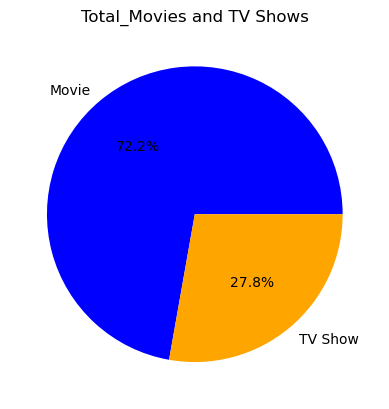

In [19]:
types = a.type.value_counts()
plt.pie(types,  labels=types.index, autopct='%1.1f%%' , colors = ['blue' , 'orange'])
plt.title('Total_Movies and TV Shows')
plt.show()

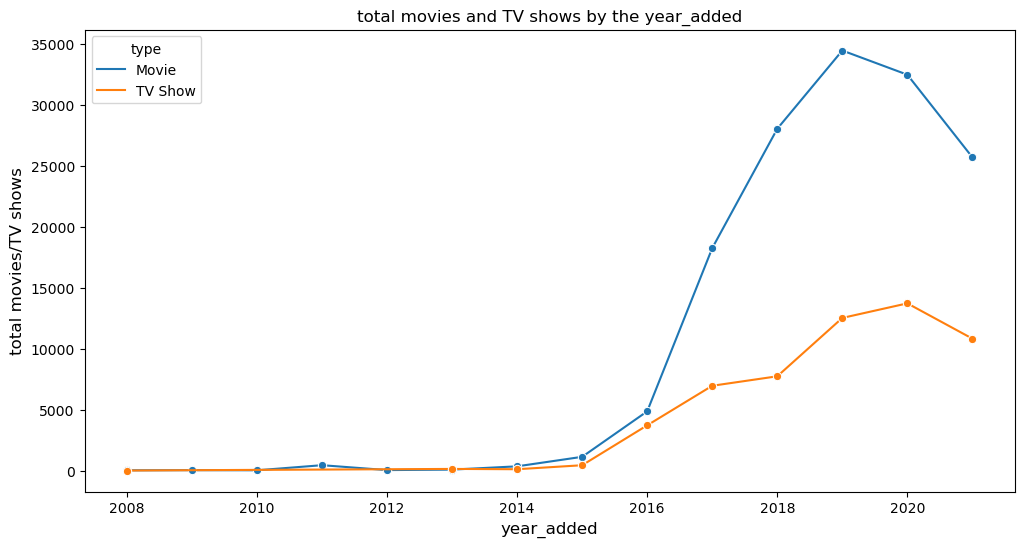

In [20]:
a['date_added'] = pd.to_datetime(a['date_added'])
a['year_added'] = a['date_added'].dt.year
d = a.groupby(['year_added' ,'type' ])['show_id'].count().reset_index()
d.rename({'show_id' : 'total movies/TV shows'}, axis = 1 , inplace = True)
plt.figure(figsize = (12,6))
sns.lineplot(data = d , x = 'year_added' , y = 'total movies/TV shows' , hue = 'type', marker = 'o'  , ms = 6)
plt.xlabel('year_added' , fontsize = 12)
plt.ylabel('total movies/TV shows' , fontsize = 12)
plt.title('total movies and TV shows by the year_added' , fontsize = 12)
plt.show()

Obeservation:
    1) After 2015, there is uptick in content existed in netflex   
    2)In 2019, highest movies & TV shows added in netflex database   
    3)In 2020, reduction in addition of content may be due to pandemic    
    4)After 2020, addition of TV shows didnt fall as drastucally as movies.   
    5)Therefore, Netflex is more foused on TV shows than movies after pandemic   
    6)69% content is movies and 31% content is tv show

 Total movies/TV shows by each director

In [21]:
dir_tb = a[['show_id' , 'type' , 'director']]
dir_tb.dropna(inplace = True)
dir_tb

C:\Users\SRI RAM\AppData\Local\Temp\ipykernel_17556\1491411746.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dir_tb.dropna(inplace = True)


show_id     type          director
0         s1    Movie   Kirsten Johnson
1         s2  TV Show  Unknown Director
1         s2  TV Show  Unknown Director
1         s2  TV Show  Unknown Director
1         s2  TV Show  Unknown Director
...      ...      ...               ...
8806   s8807    Movie       Mozez Singh
8806   s8807    Movie       Mozez Singh
8806   s8807    Movie       Mozez Singh
8806   s8807    Movie       Mozez Singh
8806   s8807    Movie       Mozez Singh

[202065 rows x 3 columns]

In [22]:
top_10_dir = dir_tb.director.value_counts().head(10).index
df_new = dir_tb.loc[dir_tb['director'].isin(top_10_dir)]
df_new

show_id     type          director
1         s2  TV Show  Unknown Director
1         s2  TV Show  Unknown Director
1         s2  TV Show  Unknown Director
1         s2  TV Show  Unknown Director
1         s2  TV Show  Unknown Director
...      ...      ...               ...
8800   s8801  TV Show  Unknown Director
8800   s8801  TV Show  Unknown Director
8803   s8804  TV Show  Unknown Director
8803   s8804  TV Show  Unknown Director
8803   s8804  TV Show  Unknown Director

[53695 rows x 3 columns]

In [23]:
d_cnt1 = a.groupby('director')['show_id'].nunique().sort_values(ascending  = False)[0:11].reset_index()
d
d_cnt1

director  show_id
0      Unknown Director     2634
1         Rajiv Chilaka       22
2             Jan Suter       18
3          RaÃºl Campos       18
4          Marcus Raboy       16
5           Suhas Kadav       16
6             Jay Karas       15
7   Cathy Garcia-Molina       13
8           Jay Chapman       12
9       Martin Scorsese       12
10      Youssef Chahine       12

Observation:
    1) Rajiv Chilaka, Jan Suter, Raúl Campos are top 3 in adding content to netflex

Outliers for number of movies directed by each director

In [24]:
mp = dir_tb.director.value_counts()
mp

director
Unknown Director       50643
Martin Scorsese          419
Youssef Chahine          409
Cathy Garcia-Molina      356
Steven Spielberg         355
                       ...  
 Reuben Atlas              1
Max Amini                  1
Bassam Tariq               1
Paul Miller                1
Kirsten Johnson            1
Name: count, Length: 5121, dtype: int64

In [25]:
def calculate_outliers(data):
    # Calculate the first quartile (Q1)
    q1 = np.percentile(data, 25)
    
    # Calculate the third quartile (Q3)
    q3 = np.percentile(data, 75)
    
    # Calculate the interquartile range (IQR)
    iqr = q3 - q1
    
    # Determine the lower and upper bounds for outliers
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    
    # Identify outliers in the dataset
    outliers = [value for value in data if value < lower_bound or value > upper_bound]
    
    return outliers

In [26]:
def calculate_max_occurred_value(data):
    # Calculate the unique values and their counts in the dataset
    unique_values, value_counts = np.unique(data, return_counts=True)
    
    # Find the index of the maximum count
    max_count_index = np.argmax(value_counts)
    
    # Retrieve the corresponding unique value with the maximum count
    max_occurred_value = unique_values[max_count_index]
    
    return max_occurred_value

In [27]:
outliers = calculate_outliers(mp)  # Implement your outlier calculation method
max_occurred_value = calculate_max_occurred_value(mp)  # Implement your method to find the maximum-occurred value
set(outliers) 

{72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 114,
 116,
 117,
 118,
 120,
 121,
 122,
 124,
 126,
 127,
 128,
 129,
 130,
 132,
 133,
 135,
 136,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 167,
 168,
 171,
 172,
 174,
 176,
 177,
 179,
 180,
 181,
 182,
 183,
 185,
 186,
 188,
 189,
 193,
 198,
 199,
 204,
 205,
 209,
 210,
 216,
 219,
 220,
 223,
 225,
 227,
 231,
 240,
 242,
 248,
 255,
 260,
 270,
 293,
 306,
 308,
 336,
 355,
 356,
 409,
 419,
 50643}

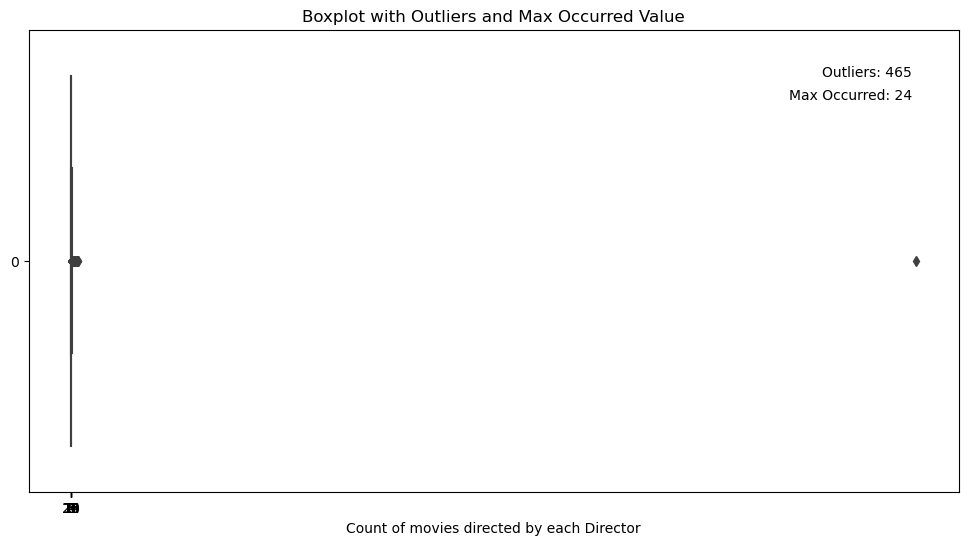

In [28]:
plt.figure(figsize = (12,6))
sns.boxplot(data=mp, showfliers=True, whis=1.5 , orient = 'h')

# Calculate the outliers and maximum-occurred value
outliers = calculate_outliers(mp)  # Implement your outlier calculation method
max_occurred_value = calculate_max_occurred_value(mp)  # Implement your method to find the maximum-occurred value

# Annotate the plot
plt.text(0.95, 0.9, f"Outliers: {len(outliers)}", transform=plt.gca().transAxes, ha='right')
plt.text(0.95, 0.85, f"Max Occurred: {max_occurred_value}", transform=plt.gca().transAxes, ha='right')


plt.xlabel("Count of movies directed by each Director")
plt.xticks(np.arange(0,22,2))
plt.title("Boxplot with Outliers and Max Occurred Value")

# Show the plot
plt.show()

Total movies/TV shows by each country

In [29]:
country_tb = a[['show_id' , 'type' , 'country']]

In [30]:
top_10_country = country_tb.country.value_counts().head(10).index
df_new = country_tb.loc[country_tb['country'].isin(top_10_country)]
x = df_new.groupby(['country' , 'type'])['show_id'].count().reset_index()
x.pivot(index = 'country' , columns = 'type' , values = 'show_id').sort_values('Movie',ascending = False)

type             Movie  TV Show
country                        
United States    38316    11552
India            20761     1378
 United States    7501     1981
Unknown country   6199     5698
United Kingdom    5655     4078
France            3015     1167
Canada            2928     1467
Japan             2644     4673
Spain             2608     1647
South Korea        980     3648

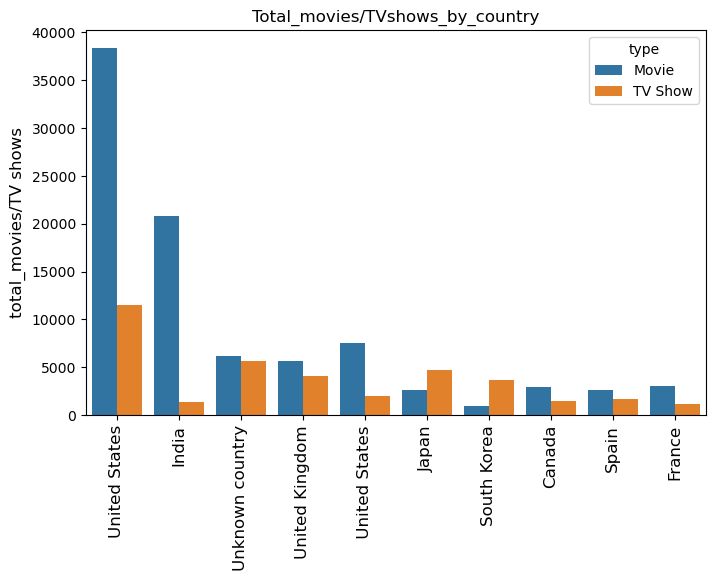

In [31]:
plt.figure(figsize= (8,5))
sns.countplot(data = df_new , x = 'country' , order = top_10_country , hue = 'type')
plt.xticks(rotation = 90 , fontsize = 12)
plt.ylabel('total_movies/TV shows' , fontsize = 12)
plt.xlabel('')
plt.title('Total_movies/TVshows_by_country')
plt.show()

Observation:
    1)International Movies and TV Shows , Dramas , and Comedies are the top 3 genres on Netflix for both Movies and TV shows.

In [32]:
df_new

show_id     type          country
0         s1    Movie    United States
2         s3  TV Show  Unknown country
2         s3  TV Show  Unknown country
2         s3  TV Show  Unknown country
2         s3  TV Show  Unknown country
...      ...      ...              ...
8806   s8807    Movie            India
8806   s8807    Movie            India
8806   s8807    Movie            India
8806   s8807    Movie            India
8806   s8807    Movie            India

[127896 rows x 3 columns]

In [33]:
mp=df_new.country.value_counts()[0:11]
mp

country
United States      49868
India              22139
Unknown country    11897
United Kingdom      9733
 United States      9482
Japan               7317
South Korea         4628
Canada              4395
Spain               4255
France              4182
Name: count, dtype: int64

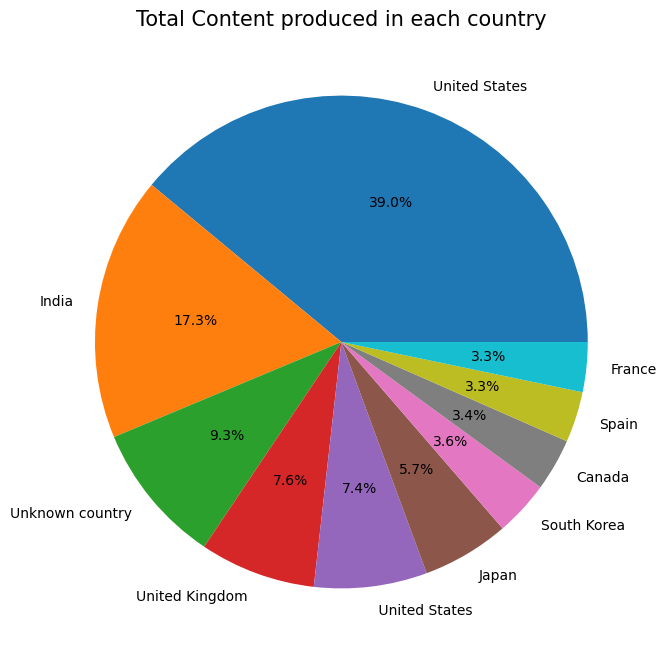

In [34]:
plt.figure(figsize = (8,8))
plt.pie(mp , labels = mp.index, autopct='%1.1f%%')
plt.title('Total Content produced in each country' , fontsize = 15)
plt.show()

Observation:
1) most of movies added to netflex are from United states, india comes second and content from UK is 3rd largest in the world
2)75%+ content on netflex comes from these 3 nations and rest of the world contribute 25%

Content distribution as per release_date

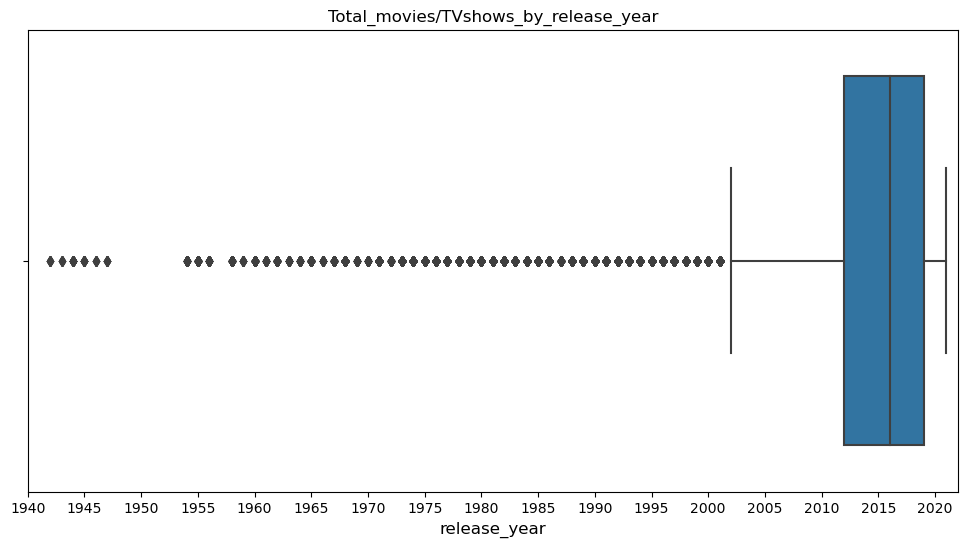

In [35]:
plt.figure(figsize= (12,6))
sns.boxplot(data = a , x = 'release_year')
plt.xlabel('release_year' , fontsize = 12)
plt.title('Total_movies/TVshows_by_release_year')
plt.xticks(np.arange(1940 , 2021 , 5))
plt.xlim((1940 , 2022))
plt.show()

Observation:
    1)Netflix have major content which is released in the year range 2000-2021
    2)It seems that the content older than year 2000 is almost missing from the Netflix.

# Bivariant

In [36]:
genre_tb = a[['show_id' , 'type', 'listed_in']]

In [37]:
top_20_country = country_tb.country.value_counts().head(20).index
top_20_country = country_tb.loc[country_tb['country'].isin(top_20_country)]
x = top_20_country.merge(genre_tb , on = 'show_id').drop_duplicates()
country_genre = x.groupby([ 'country' , 'listed_in'])['show_id'].count().sort_values(ascending = False).reset_index()
country_genre = country_genre.pivot(index = 'listed_in' , columns = 'country' , values = 'show_id')
x

show_id   type_x          country   type_y                 listed_in
0            s1    Movie    United States    Movie             Documentaries
1            s3  TV Show  Unknown country  TV Show            Crime TV Shows
2            s3  TV Show  Unknown country  TV Show    International TV Shows
3            s3  TV Show  Unknown country  TV Show     TV Action & Adventure
730          s4  TV Show  Unknown country  TV Show                Docuseries
...         ...      ...              ...      ...                       ...
7651158   s8806    Movie    United States    Movie  Children & Family Movies
7651159   s8806    Movie    United States    Movie                  Comedies
7651482   s8807    Movie            India    Movie                    Dramas
7651483   s8807    Movie            India    Movie      International Movies
7651484   s8807    Movie            India    Movie          Music & Musicals

[18418 rows x 5 columns]

Text(0.5, 1.0, 'Countries V/s Genres')

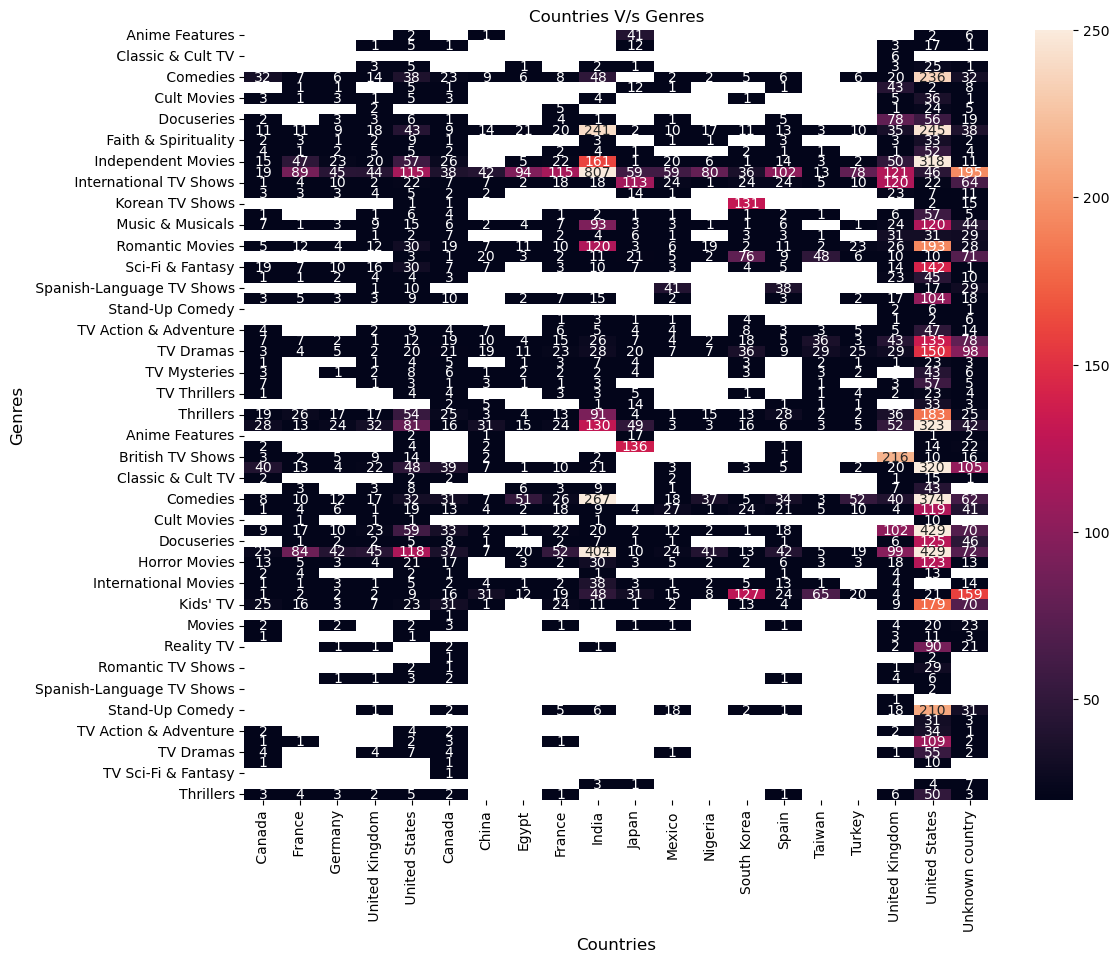

In [38]:
plt.figure(figsize = (12,10))
sns.heatmap(data = country_genre , annot = True , fmt=".0f" , vmin = 20 , vmax = 250 )
plt.xlabel('Countries' , fontsize = 12)
plt.ylabel('Genres' , fontsize = 12)
plt.title('Countries V/s Genres' , fontsize = 12)

observation:
1)Action & Adventure, Children & Family Movies, Comedies, Dramas, International Movies & TV Shows, TV Dramas, Thrillers are popular genres around the world
2)Korean TV shows (Korea), British TV Shows (UK), Anime features and Anime series (Japan), Spanish TV Shows (Argentina, Mexico and Spain), United States and UK have all kinds of genre
3)Maximum International movies are produced in India.
4 ) United States hs highest mixer of genres


In [39]:
cast_tb = a[['show_id' , 'type' ,'cast']]
x = cast_tb.merge(country_tb , on = 'show_id').drop_duplicates()
x = x.groupby(['country' , 'cast'])['show_id'].count().reset_index()
x.loc[x['country'].isin(['United States'])].sort_values('show_id' , ascending = False).head(5)

country                cast  show_id
55953  United States        Unknown cast      363
54101  United States        Adam Sandler       20
45777  United States     Fred Tatasciore       18
50391  United States       Molly Shannon       15
52226  United States   Samuel L. Jackson       14

In [40]:
country_list = ['India'  , 'United Kingdom' , 'Canada' , 'France' , 'Japan']
top_5_actors = x.loc[x['country'].isin(['United States'])].sort_values('show_id' , ascending = False).head(5)

for i in country_list:
    new = x.loc[x['country'].isin([i])].sort_values('show_id' , ascending = False).head(5)
    top_5_actors = pd.concat( [top_5_actors , new] , ignore_index = True)
    

# top 5 actors in top countries and their movies/tv shows count
top_5_actors



country                 cast  show_id
0    United States         Unknown cast      363
1    United States         Adam Sandler       20
2    United States      Fred Tatasciore       18
3    United States        Molly Shannon       15
4    United States    Samuel L. Jackson       14
5            India          Anupam Kher       36
6            India         Unknown cast       32
7            India       Shah Rukh Khan       25
8            India         Paresh Rawal       24
9            India              Om Puri       24
10  United Kingdom         Unknown cast       81
11  United Kingdom        Michael Palin       13
12  United Kingdom   David Attenborough       12
13  United Kingdom          Terry Jones       11
14  United Kingdom            Eric Idle       11
15          Canada         Unknown cast       26
16          Canada   John Paul Tremblay       11
17          Canada           Robb Wells       11
18          Canada       John Dunsworth       11
19          Canada           Cory Doran        8
20          France         Unknown cast       22
21          France       Wille Lindberg        5
22          France         Julia Piaton        4
23          France        Jesse Richman        4
24          France         Matt Annetts        4
25           Japan     Takahiro Sakurai       28
26           Japan            Yuki Kaji       24
27           Japan       Junichi Suwabe       19
28           Japan            Ai Kayano       18
29           Japan          Daisuke Ono       18

In [41]:
top_5_actors = top_5_actors.iloc[-1:-11:-1]
top_5_actors

country               cast  show_id
29   Japan        Daisuke Ono       18
28   Japan          Ai Kayano       18
27   Japan     Junichi Suwabe       19
26   Japan          Yuki Kaji       24
25   Japan   Takahiro Sakurai       28
24  France       Matt Annetts        4
23  France      Jesse Richman        4
22  France       Julia Piaton        4
21  France     Wille Lindberg        5
20  France       Unknown cast       22

<Axes: xlabel='show_id', ylabel='cast'>

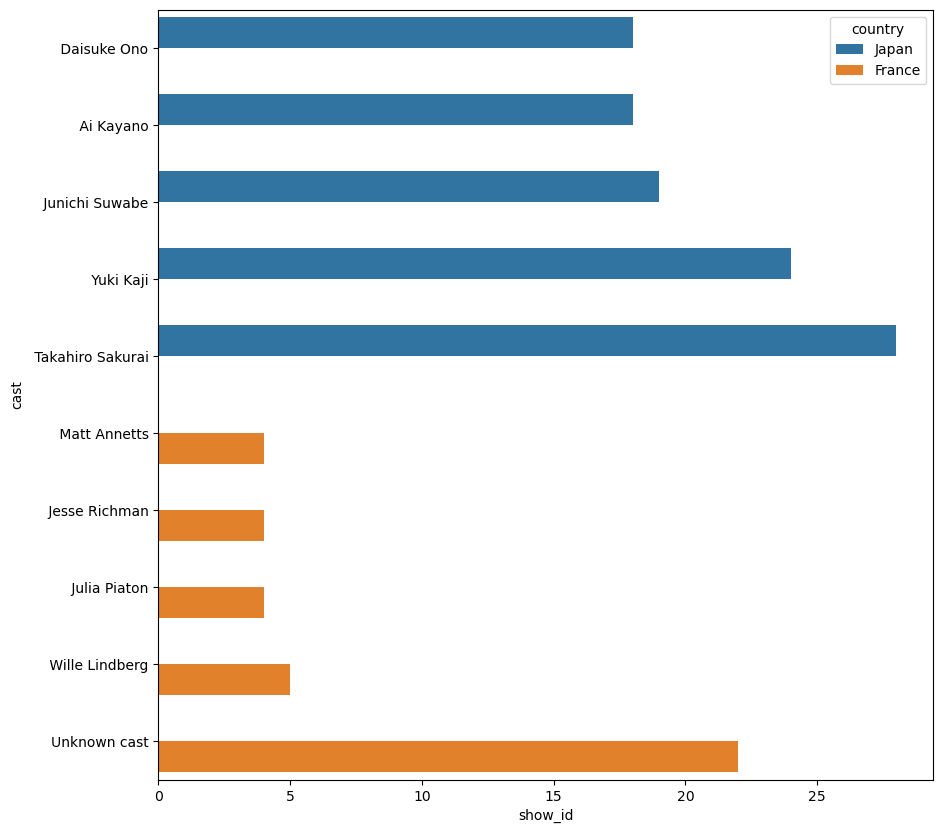

In [42]:
plt.figure(figsize = (10,10))
sns.barplot(data = top_5_actors , y = 'cast' , x = 'show_id' , hue = 'country')

In [43]:
dir_tb = a[['show_id' , 'type' , 'director']]

In [44]:
genre_list = [ 'Children & Family Movies', 'Comedies','Dramas', 'International Movies', 'Documentaries' ,
              'International TV Shows', 'Sci-Fi & Fantasy', 'Thrillers', 'Horror Movies']

x = dir_tb.merge(genre_tb , on = 'show_id').groupby([ 'listed_in' , 'director',])['show_id'].count().reset_index()

top_5_dir = x.loc[x['listed_in'] == 'Action & Adventure'].sort_values('show_id' , ascending = False).head()

for i in genre_list:
    new = x.loc[x['listed_in'] == i].sort_values('show_id' , ascending = False).head()
    top_5_dir = pd.concat([top_5_dir , new])
    
top_5_dir

listed_in                   director  show_id
7225         Action & Adventure            Lilly Wachowski    15860
6866         Action & Adventure             Lana Wachowski    15860
7140         Action & Adventure           Joachim RÃ¸nning    15000
6843         Action & Adventure             Espen Sandberg    15000
6891         Action & Adventure                 Tom Tykwer    14400
8065   Children & Family Movies               Roger Allers    24900
7701   Children & Family Movies                 Nina Paley    24500
7664   Children & Family Movies              Joan C. Gratz    24500
7650   Children & Family Movies             GaÃ«tan Brizzi    24500
7695   Children & Family Movies              Michael Socha    24500
8996                   Comedies             Peter Farrelly    18636
8267                   Comedies      Jonathan van Tulleken    18252
8253                   Comedies              Griffin Dunne    18252
8237                   Comedies               Brett Ratner    18252
8305                   Comedies                Steve Brill    18252
11005                    Dramas             Lars von Trier    20352
10686                    Dramas             Farhad Safinia    15488
11271                    Dramas                Petra Costa    15000
10279                    Dramas                   Lea Glob    15000
10464                    Dramas                 Ari Folman    14700
11980      International Movies             Brian De Palma     6272
11997      International Movies              Gabe IbÃ¡Ã±ez     3888
11994      International Movies  Fernando GonzÃ¡lez Molina     3496
11971      International Movies             Ali F. Mostafa     1200
11961      International Movies              Rick Benattar     1024
9806              Documentaries             Jehane Noujaim     4050
10045             Documentaries               Peter Spirer     2629
9954              Documentaries            Martin Scorsese     2138
9603              Documentaries               Brett Harvey     1728
9425              Documentaries            Jacques Cluzaud     1600
12166    International TV Shows           Unknown Director   204273
12086    International TV Shows            Houda Benyamina    21632
12078    International TV Shows                  Alan Poul    21632
12119    International TV Shows            Damien Chazelle    21632
12092    International TV Shows           LaÃ¯la Marrakchi    21632
12252          Sci-Fi & Fantasy                Alex Proyas     1152
12262          Sci-Fi & Fantasy              Wally Pfister     1152
12250          Sci-Fi & Fantasy       Christopher Caldwell      576
12264          Sci-Fi & Fantasy                  Zeek Earl      576
12253          Sci-Fi & Fantasy           Alice Waddington      512
12570                 Thrillers                 Ron Howard     2000
12574                 Thrillers             Sydney Pollack     1936
12550                 Thrillers                John Madden     1936
12556                 Thrillers               Lee Tamahori     1089
12548                 Thrillers               Jane Campion     1024
11712             Horror Movies               Babak Anvari     4800
11785             Horror Movies         Guillermo del Toro     2700
11768             Horror Movies                   Eli Roth     2426
11808             Horror Movies           Jovanka Vuckovic     2304
11673             Horror Movies               Karyn Kusama     2304

# 1)Find the counts of each categorical variable both using graphical and non-graphical analysis. 

For Non-graphical Analysis:

In [45]:
a.head(1)

show_id   type                 title         director          cast  \
0      s1  Movie  Dick Johnson Is Dead  Kirsten Johnson  Unknown cast   

         country date_added  release_year rating duration      listed_in  \
0  United States 2021-09-25          2020  PG-13   90 min  Documentaries   

                                         description  year_added  
0  As her father nears the end of his life, filmm...        2021

In [46]:
a.show_id.value_counts()

show_id
s7165    700
s6985    504
s7516    468
s2554    416
s5306    378
        ... 
s6330      1
s8176      1
s937       1
s3387      1
s1         1
Name: count, Length: 8807, dtype: int64

In [47]:
a.show_id.value_counts()

show_id
s7165    700
s6985    504
s7516    468
s2554    416
s5306    378
        ... 
s6330      1
s8176      1
s937       1
s3387      1
s1         1
Name: count, Length: 8807, dtype: int64

In [48]:
a.type.value_counts()

type
Movie      145917
TV Show     56148
Name: count, dtype: int64

In [49]:
a.title.value_counts()

title
Kahlil Gibran's The Prophet    700
Holidays                       504
Movie 43                       468
The Eddy                       416
Narcos                         378
                              ... 
Blackfish                        1
The 2000s                        1
Miniforce: Super Dino Power      1
Dancing with the Birds           1
Dick Johnson Is Dead             1
Name: count, Length: 8807, dtype: int64

In [50]:
a.director.value_counts()

director
Unknown Director       50643
Martin Scorsese          419
Youssef Chahine          409
Cathy Garcia-Molina      356
Steven Spielberg         355
                       ...  
 Reuben Atlas              1
Max Amini                  1
Bassam Tariq               1
Paul Miller                1
Kirsten Johnson            1
Name: count, Length: 5121, dtype: int64

In [51]:
a.cast.value_counts()

cast
Unknown cast             2149
 Alfred Molina            160
 Salma Hayek              130
 Frank Langella           128
 John Rhys-Davies         125
                         ... 
 Cle Sloan                  1
 George Konner              1
 Andy Hayward               1
 Lyric Lewis                1
 Trent 'Maxi' Maxwell       1
Name: count, Length: 39297, dtype: int64

In [52]:
a.country.value_counts()

country
United States      49868
India              22139
Unknown country    11897
United Kingdom      9733
 United States      9482
                   ...  
 Samoa                 2
 Sri Lanka             2
 Kazakhstan            1
 Uganda                1
 Nicaragua             1
Name: count, Length: 198, dtype: int64

In [53]:
a.date_added.value_counts()

date_added
2020-01-01    3906
2019-11-01    2258
2021-07-01    2219
2017-10-01    1899
2021-09-01    1756
              ... 
2014-11-14       1
2017-01-24       1
2020-11-18       1
2017-01-23       1
2021-09-25       1
Name: count, Length: 1714, dtype: int64

In [54]:
a.release_year.value_counts()

release_year
2018    24441
2019    21931
2017    20516
2020    19697
2016    18465
        ...  
1947        8
1946        6
1942        6
1943        5
1925        1
Name: count, Length: 74, dtype: int64

In [55]:
a.rating.value_counts()

rating
TV-MA       73915
TV-14       43957
R           25860
PG-13       16246
TV-PG       14926
PG          10919
TV-Y7        6304
TV-Y         3665
TV-G         2779
NR           1573
G            1530
NC-17         149
TV-Y7-FV       86
UR             86
MISSING        67
74 min          1
84 min          1
66 min          1
Name: count, dtype: int64

In [56]:
a.duration.value_counts()

duration
1 Season     35035
2 Seasons     9559
3 Seasons     5084
94 min        4343
106 min       4040
             ...  
5 min            3
0 min            3
8 min            2
11 min           2
9 min            2
Name: count, Length: 221, dtype: int64

In [57]:
a.listed_in.value_counts()

listed_in
 International Movies    27141
Dramas                   19657
Comedies                 13894
Action & Adventure       12216
 Dramas                  10149
                         ...  
 Stand-Up Comedy            24
Romantic Movies             20
TV Sci-Fi & Fantasy          7
LGBTQ Movies                 5
Sports Movies                3
Name: count, Length: 73, dtype: int64

In [58]:
a.description.value_counts()

description
A troubled young girl and her mother find solace on a journey with a subversive poet whose words captivate their hearts and imaginations.                   700
Eight gleefully grim short tales set on Halloween, Mother's Day, St. Patrick's Day and other holidays comprise this chilling horror anthology.              504
An eye-popping cast stars in this sketch-comedy collage, the new millennium's homage to classic anthology films like The Kentucky Fried Movie.              468
The owner of a Paris jazz club gets tangled up with dangerous criminals as he fights to protect his business, his band and his teenage daughter.            416
The true story of Colombia's infamously violent and powerful drug cartels fuels this gritty gangster drama series.                                          378
                                                                                                                                                           ... 
Chris D'Elia takes the stage

1b) For graphical analysis:

count plot:

In [59]:
ab=a.show_id.value_counts().sort_values(ascending  = False)[0:11].reset_index()
ab

show_id  count
0    s7165    700
1    s6985    504
2    s7516    468
3    s2554    416
4    s5306    378
5    s6502    360
6    s3125    330
7    s7224    300
8    s3543    300
9    s6911    288
10   s3450    282

<Axes: xlabel='show_id'>

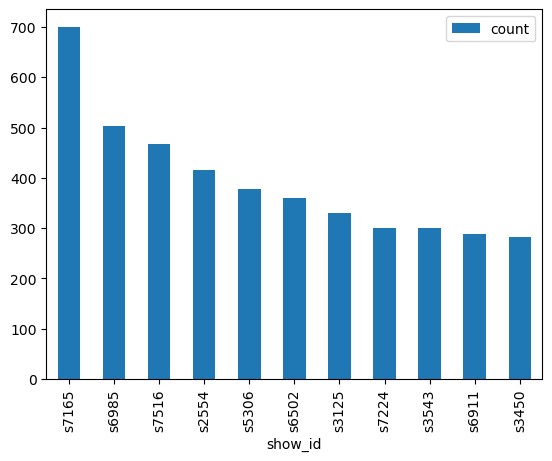

In [60]:
ab.plot.bar(x='show_id',y='count', rot=90)

In [61]:
ab=a.title.value_counts().sort_values(ascending  = False)[0:11].reset_index()
ab

title  count
0   Kahlil Gibran's The Prophet    700
1                      Holidays    504
2                      Movie 43    468
3                      The Eddy    416
4                        Narcos    378
5                   Cloud Atlas    360
6        Sincerely Yours, Dhaka    330
7                      Kon-Tiki    300
8            Olmo & the Seagull    300
9                  HALO Legends    288
10                  Creeped Out    282

<Axes: xlabel='title'>

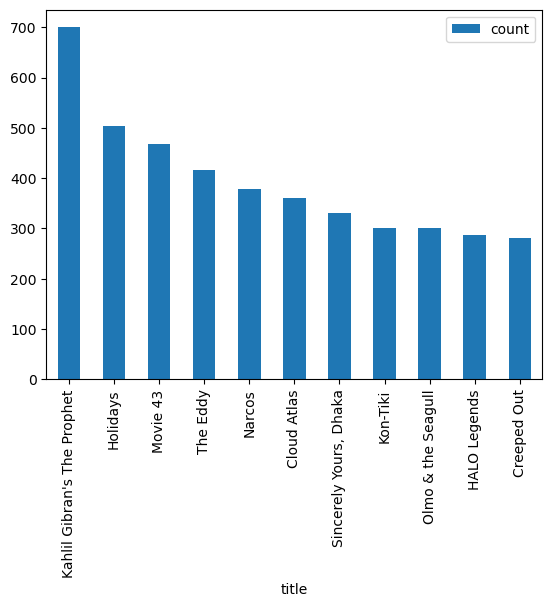

In [62]:
ab.plot.bar(x='title',y='count', rot=90)

In [63]:
ab=a.type.value_counts().sort_values(ascending  = False)[0:11].reset_index()
ab

type   count
0    Movie  145917
1  TV Show   56148

<Axes: xlabel='type'>

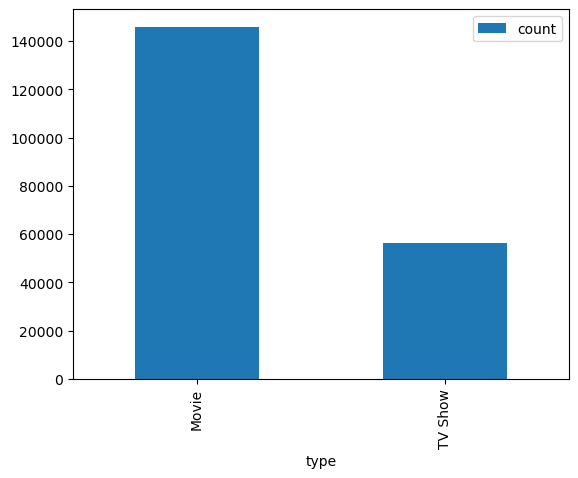

In [64]:
ab.plot.bar(x='type',y='count', rot=90)

In [65]:
ab=a.director.value_counts().sort_values(ascending  = False)[1:11].reset_index()
ab

director  count
0      Martin Scorsese    419
1      Youssef Chahine    409
2  Cathy Garcia-Molina    356
3     Steven Spielberg    355
4       Lars von Trier    336
5         Raja Gosnell    308
6           Tom Hooper    306
7                  McG    293
8         David Dhawan    270
9           Wilson Yip    260

<Axes: xlabel='director'>

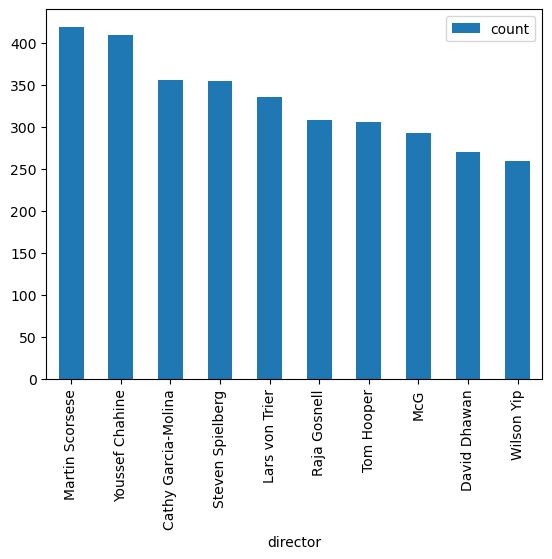

In [66]:
ab.plot.bar(x='director',y='count', rot=90)

In [67]:
ab=a.country.value_counts().sort_values(ascending  = False)[0:11].reset_index()
ab

country  count
0     United States  49868
1             India  22139
2   Unknown country  11897
3    United Kingdom   9733
4     United States   9482
5             Japan   7317
6       South Korea   4628
7            Canada   4395
8             Spain   4255
9            France   4182
10           France   4072

<Axes: xlabel='country'>

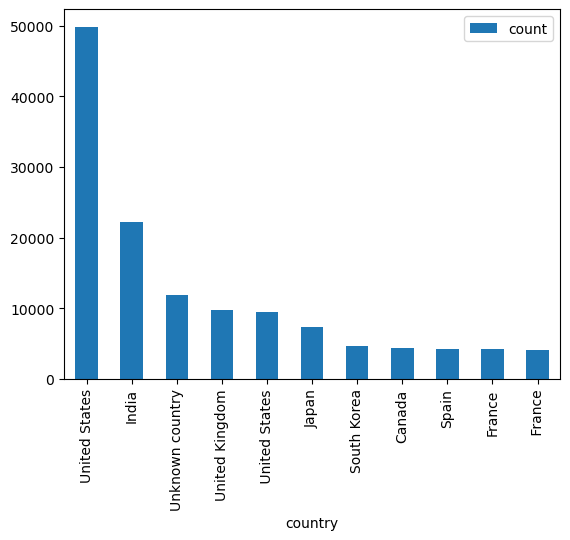

In [68]:
ab.plot.bar(x='country',y='count', rot=90)

In [69]:
ab=a.release_year.value_counts().sort_values(ascending  = False)[0:11].reset_index()
ab

release_year  count
0           2018  24441
1           2019  21931
2           2017  20516
3           2020  19697
4           2016  18465
5           2015  14128
6           2021  11894
7           2014   9098
8           2013   7745
9           2012   6354
10          2010   5109

<Axes: xlabel='release_year'>

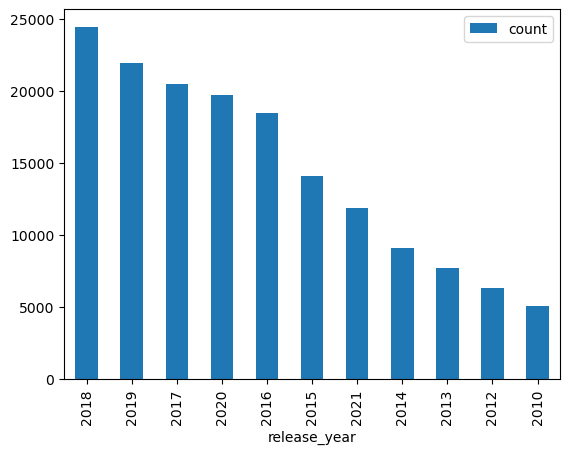

In [70]:
ab.plot.bar(x='release_year',y='count', rot=90)

In [71]:
ab=a.rating.value_counts().sort_values(ascending  = False)[0:11].reset_index()
ab

rating  count
0   TV-MA  73915
1   TV-14  43957
2       R  25860
3   PG-13  16246
4   TV-PG  14926
5      PG  10919
6   TV-Y7   6304
7    TV-Y   3665
8    TV-G   2779
9      NR   1573
10      G   1530

<Axes: xlabel='rating'>

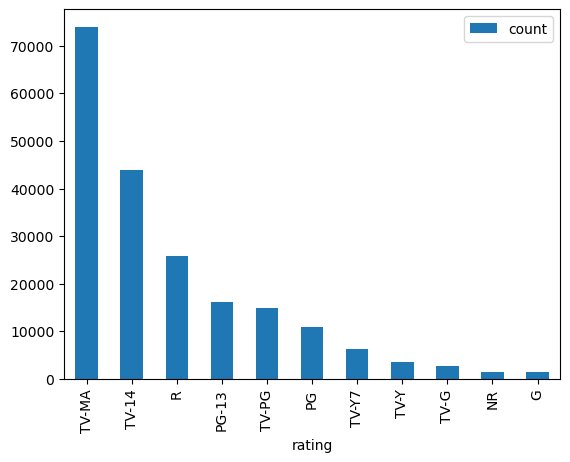

In [72]:
ab.plot.bar(x='rating',y='count', rot=90)

In [73]:
ab=a.listed_in.value_counts().sort_values(ascending  = False)[0:11].reset_index()
ab

listed_in  count
0       International Movies  27141
1                     Dramas  19657
2                   Comedies  13894
3         Action & Adventure  12216
4                     Dramas  10149
5         Independent Movies   9564
6   Children & Family Movies   9294
7                  TV Dramas   7956
8     International TV Shows   7065
9                   Comedies   6935
10           Romantic Movies   6392

<Axes: xlabel='listed_in'>

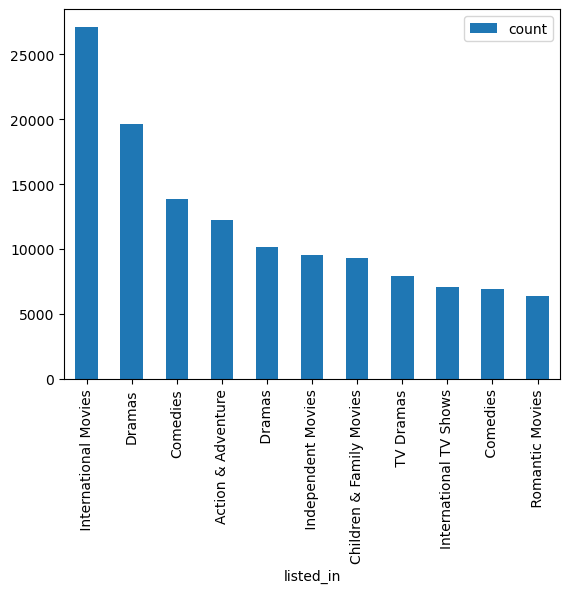

In [74]:
ab.plot.bar(x='listed_in',y='count', rot=90)

In [75]:
ab=a.date_added.value_counts().sort_values(ascending  = False)[0:11].reset_index()
ab

date_added  count
0  2020-01-01   3906
1  2019-11-01   2258
2  2021-07-01   2219
3  2017-10-01   1899
4  2021-09-01   1756
5  2018-03-01   1752
6  2019-12-31   1695
7  2019-10-01   1569
8  2018-10-01   1419
9  2021-06-02   1260
10 2021-08-01   1248

<Axes: xlabel='date_added'>

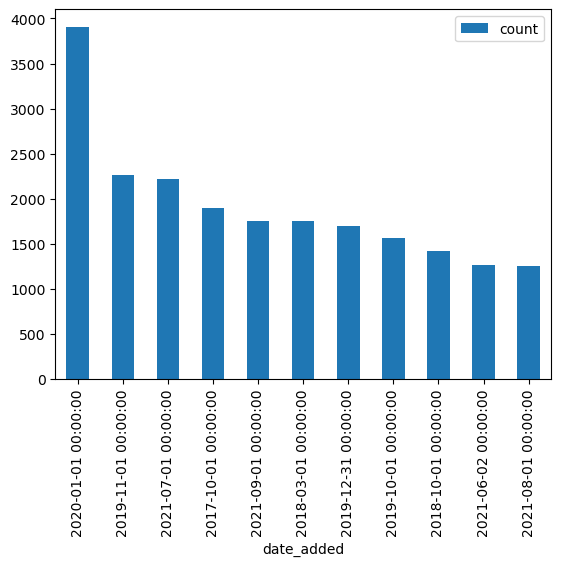

In [76]:
ab.plot.bar(x='date_added',y='count', rot=90)

# 2)comparing tv and movies

 2a) Find the number of movies produced in each country and pick the top 10 countries.

In [77]:
a.head()

show_id     type                 title          director          cast  \
0      s1    Movie  Dick Johnson Is Dead   Kirsten Johnson  Unknown cast   
1      s2  TV Show         Blood & Water  Unknown Director    Ama Qamata   
1      s2  TV Show         Blood & Water  Unknown Director    Ama Qamata   
1      s2  TV Show         Blood & Water  Unknown Director    Ama Qamata   
1      s2  TV Show         Blood & Water  Unknown Director   Khosi Ngema   

         country date_added  release_year rating   duration  \
0  United States 2021-09-25          2020  PG-13     90 min   
1   South Africa 2021-09-24          2021  TV-MA  2 Seasons   
1   South Africa 2021-09-24          2021  TV-MA  2 Seasons   
1   South Africa 2021-09-24          2021  TV-MA  2 Seasons   
1   South Africa 2021-09-24          2021  TV-MA  2 Seasons   

                listed_in                                        description  \
0           Documentaries  As her father nears the end of his life, filmm...   
1  International TV Shows  After crossing paths at a party, a Cape Town t...   
1               TV Dramas  After crossing paths at a party, a Cape Town t...   
1            TV Mysteries  After crossing paths at a party, a Cape Town t...   
1  International TV Shows  After crossing paths at a party, a Cape Town t...   

   year_added  
0        2021  
1        2021  
1        2021  
1        2021  
1        2021

In [78]:
country_tb = a[['show_id' , 'type' , 'country']]

In [79]:
x = country_tb.groupby(['country' , 'type'])['show_id'].count().reset_index()
x.pivot(index = ['country'] , columns = 'type' , values = 'show_id').sort_values('Movie',ascending = False)

type               Movie  TV Show
country                          
United States    38316.0  11552.0
India            20761.0   1378.0
 United States    7501.0   1981.0
Unknown country   6199.0   5698.0
United Kingdom    5655.0   4078.0
...                  ...      ...
Jordan               NaN     45.0
Luxembourg           NaN     24.0
Puerto Rico          NaN     27.0
Senegal              NaN     24.0
Ukraine              NaN     50.0

[198 rows x 2 columns]

In [80]:
x

country     type  show_id
0                    Movie       98
1                  TV Show        8
2     Afghanistan    Movie        2
3         Albania    Movie        8
4         Algeria    Movie       77
..            ...      ...      ...
286       Uruguay  TV Show        3
287     Venezuela    Movie        4
288       Vietnam    Movie      134
289  West Germany    Movie        4
290      Zimbabwe    Movie       36

[291 rows x 3 columns]

In [81]:
y= x[x['type']=='Movie']
yk=y[['country', 'show_id']]
yka= yk.groupby(['country'])['show_id'].count().reset_index()
yk

country  show_id
0                       98
2     Afghanistan        2
3         Albania        8
4         Algeria       77
5          Angola       32
..            ...      ...
285       Uruguay      122
287     Venezuela        4
288       Vietnam      134
289  West Germany        4
290      Zimbabwe       36

[188 rows x 2 columns]

In [82]:
df_movies =yk.groupby('country')['show_id'].max()
dfkp=df_movies.sort_values(ascending  = False)[0:11].reset_index()
dfkp

country  show_id
0     United States    38316
1             India    20761
2     United States     7501
3   Unknown country     6199
4    United Kingdom     5655
5            France     3592
6            France     3015
7            Canada     2928
8    United Kingdom     2925
9            Canada     2810
10            Japan     2644

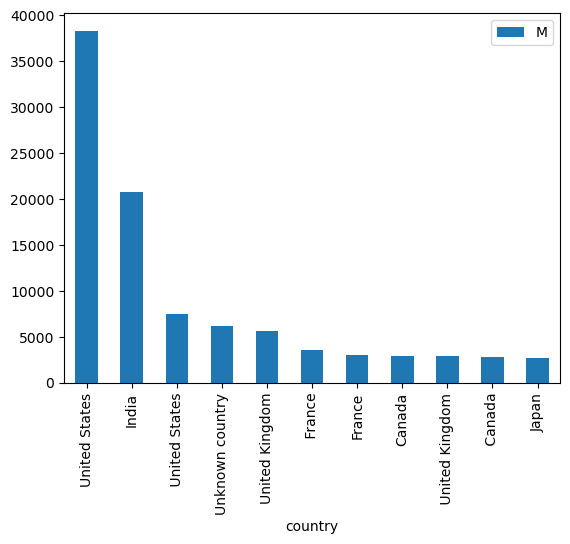

In [83]:
dfkp.plot.bar(x='country',y='show_id', rot=90)
plt.legend('Movies')


In [84]:
x

country     type  show_id
0                    Movie       98
1                  TV Show        8
2     Afghanistan    Movie        2
3         Albania    Movie        8
4         Algeria    Movie       77
..            ...      ...      ...
286       Uruguay  TV Show        3
287     Venezuela    Movie        4
288       Vietnam    Movie      134
289  West Germany    Movie        4
290      Zimbabwe    Movie       36

[291 rows x 3 columns]

In [85]:
ya= x[x['type']=='TV Show']
ya

country     type  show_id
1                          TV Show        8
9               Australia  TV Show      143
11             Azerbaijan  TV Show       33
15                Belgium  TV Show       79
19                 Brazil  TV Show       48
..                    ...      ...      ...
278  United Arab Emirates  TV Show       39
280        United Kingdom  TV Show     4078
282         United States  TV Show    11552
284       Unknown country  TV Show     5698
286               Uruguay  TV Show        3

[103 rows x 3 columns]

In [86]:
df_tvshow =ya.groupby('country')['show_id'].max()
dfk=df_tvshow.sort_values(ascending  = False)[0:11].reset_index()
dfk

country  show_id
0     United States    11552
1   Unknown country     5698
2             Japan     4673
3    United Kingdom     4078
4       South Korea     3648
5     United States     1981
6            Taiwan     1719
7            Mexico     1683
8             Spain     1647
9            Canada     1467
10            India     1378

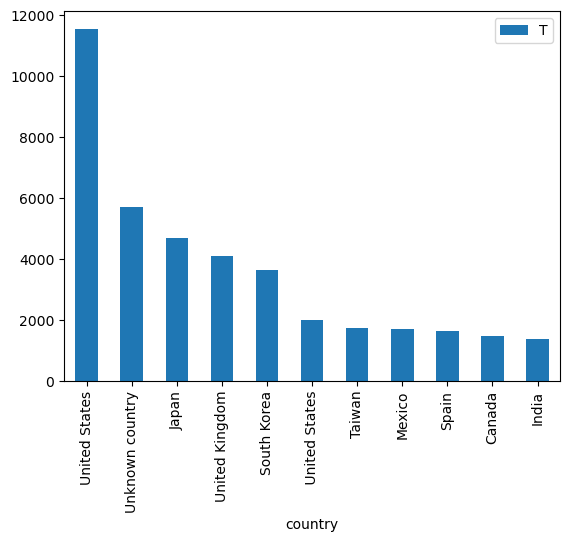

In [87]:
dfk.plot.bar(x='country', rot=90)
plt.legend('TV_Shows')

# 3)Analysis of actors/directors of different types of shows/movies.

3a) Identify the top 10 directors who have appeared in most movies or TV shows.

In [88]:
d_cnt = a.groupby('director')['title'].nunique().sort_values(ascending  = False)[0:11].reset_index()
d_cnt

director  title
0      Unknown Director   2634
1         Rajiv Chilaka     22
2             Jan Suter     18
3          RaÃºl Campos     18
4          Marcus Raboy     16
5           Suhas Kadav     16
6             Jay Karas     15
7   Cathy Garcia-Molina     13
8           Jay Chapman     12
9       Martin Scorsese     12
10      Youssef Chahine     12

In [89]:
d_cnt = d_cnt.iloc[-1:-11:-1]
d_cnt

director  title
10      Youssef Chahine     12
9       Martin Scorsese     12
8           Jay Chapman     12
7   Cathy Garcia-Molina     13
6             Jay Karas     15
5           Suhas Kadav     16
4          Marcus Raboy     16
3          RaÃºl Campos     18
2             Jan Suter     18
1         Rajiv Chilaka     22

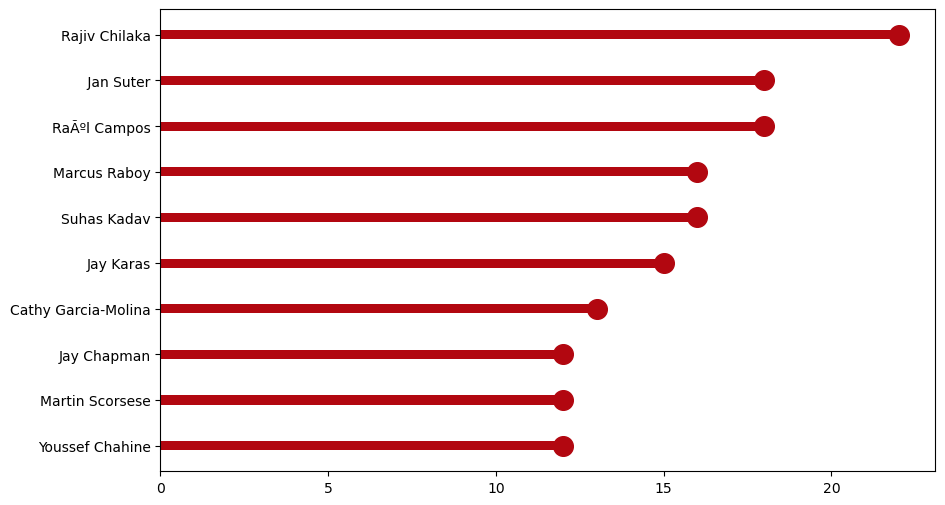

In [90]:
fig,ax = plt.subplots(figsize = (10,6))
ax.barh(y = d_cnt['director'],width = d_cnt['title'],height = 0.2,color = '#b20710')
ax.scatter(y = d_cnt['director'], x = d_cnt['title'] , s = 200 , color = '#b20710' )


3b)Identify the top 10 directors who have appeared in most movies or TV shows.

In [91]:
actors = a.groupby('cast')['title'].nunique().sort_values(ascending  = False)[0:11].reset_index()

actors

cast  title
0        Unknown cast    825
1         Anupam Kher     39
2        Rupa Bhimani     31
3    Takahiro Sakurai     30
4       Julie Tejwani     28
5             Om Puri     27
6      Shah Rukh Khan     26
7         Rajesh Kava     26
8           Yuki Kaji     25
9         Boman Irani     25
10      Andrea Libman     25

In [92]:
actors= actors.iloc[-1:-11:-1]
actors

cast  title
10      Andrea Libman     25
9         Boman Irani     25
8           Yuki Kaji     25
7         Rajesh Kava     26
6      Shah Rukh Khan     26
5             Om Puri     27
4       Julie Tejwani     28
3    Takahiro Sakurai     30
2        Rupa Bhimani     31
1         Anupam Kher     39

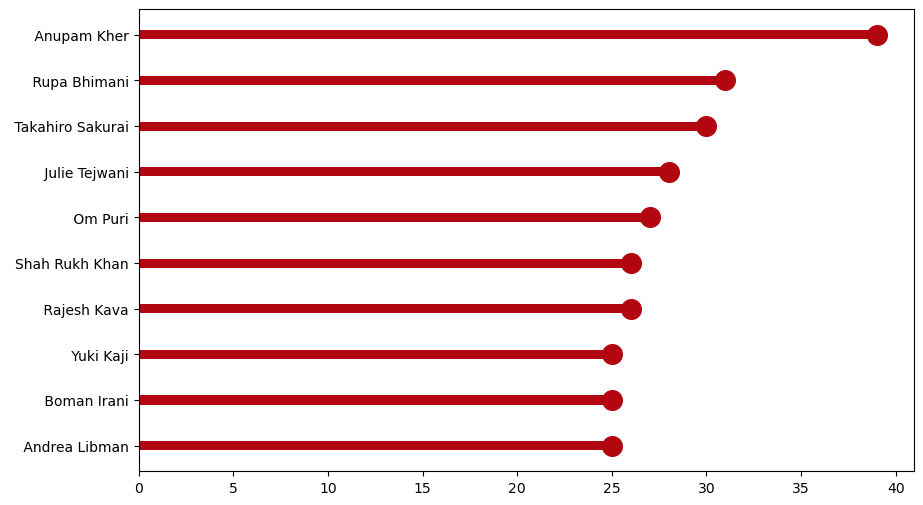

In [93]:
fig,ax = plt.subplots(figsize = (10,6))
ax.barh(y = actors['cast'],width = actors['title'],height = 0.2,color = '#b20710')
ax.scatter(y = actors['cast'], x =actors['title'] , s = 200 , color = '#b20710' )

# 4) What is the best time to launch a TV show?

4a)Find which is the best month to release the Tv-show or the movie. Do the analys is separately for Tv-shows and Movies

In [94]:
a['date_added'] = pd.to_datetime(a['date_added']) 


In [95]:
a.head()

show_id     type                 title          director          cast  \
0      s1    Movie  Dick Johnson Is Dead   Kirsten Johnson  Unknown cast   
1      s2  TV Show         Blood & Water  Unknown Director    Ama Qamata   
1      s2  TV Show         Blood & Water  Unknown Director    Ama Qamata   
1      s2  TV Show         Blood & Water  Unknown Director    Ama Qamata   
1      s2  TV Show         Blood & Water  Unknown Director   Khosi Ngema   

         country date_added  release_year rating   duration  \
0  United States 2021-09-25          2020  PG-13     90 min   
1   South Africa 2021-09-24          2021  TV-MA  2 Seasons   
1   South Africa 2021-09-24          2021  TV-MA  2 Seasons   
1   South Africa 2021-09-24          2021  TV-MA  2 Seasons   
1   South Africa 2021-09-24          2021  TV-MA  2 Seasons   

                listed_in                                        description  \
0           Documentaries  As her father nears the end of his life, filmm...   
1  International TV Shows  After crossing paths at a party, a Cape Town t...   
1               TV Dramas  After crossing paths at a party, a Cape Town t...   
1            TV Mysteries  After crossing paths at a party, a Cape Town t...   
1  International TV Shows  After crossing paths at a party, a Cape Town t...   

   year_added  
0        2021  
1        2021  
1        2021  
1        2021  
1        2021

In [96]:
a['year_added'] = a['date_added'].dt.year
a['month_added'] = a['date_added'].dt.month_name()
a['week_added'] = a['date_added'].dt.isocalendar().week

In [97]:
a.head()

show_id     type                 title          director          cast  \
0      s1    Movie  Dick Johnson Is Dead   Kirsten Johnson  Unknown cast   
1      s2  TV Show         Blood & Water  Unknown Director    Ama Qamata   
1      s2  TV Show         Blood & Water  Unknown Director    Ama Qamata   
1      s2  TV Show         Blood & Water  Unknown Director    Ama Qamata   
1      s2  TV Show         Blood & Water  Unknown Director   Khosi Ngema   

         country date_added  release_year rating   duration  \
0  United States 2021-09-25          2020  PG-13     90 min   
1   South Africa 2021-09-24          2021  TV-MA  2 Seasons   
1   South Africa 2021-09-24          2021  TV-MA  2 Seasons   
1   South Africa 2021-09-24          2021  TV-MA  2 Seasons   
1   South Africa 2021-09-24          2021  TV-MA  2 Seasons   

                listed_in                                        description  \
0           Documentaries  As her father nears the end of his life, filmm...   
1  International TV Shows  After crossing paths at a party, a Cape Town t...   
1               TV Dramas  After crossing paths at a party, a Cape Town t...   
1            TV Mysteries  After crossing paths at a party, a Cape Town t...   
1  International TV Shows  After crossing paths at a party, a Cape Town t...   

   year_added month_added  week_added  
0        2021   September          38  
1        2021   September          38  
1        2021   September          38  
1        2021   September          38  
1        2021   September          38

In [98]:
month = a.groupby('month_added')['type'].value_counts()
month.name = 'count' 
month = month.reset_index()


months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
month['month_added'] = pd.Categorical(month['month_added'], categories=months, ordered=True)

In [99]:
month.head(24)

month_added     type  count
0        April    Movie  12538
1        April  TV Show   4543
2       August    Movie  11924
3       August  TV Show   5162
4     December    Movie  12768
5     December  TV Show   5498
6     February    Movie   9137
7     February  TV Show   3923
8      January    Movie  13947
9      January  TV Show   4465
10        July    Movie  15075
11        July  TV Show   5227
12        June    Movie  11616
13        June  TV Show   5043
14       March    Movie  11507
15       March  TV Show   4352
16         May    Movie   9579
17         May  TV Show   4248
18    November    Movie  11065
19    November  TV Show   4532
20     October    Movie  13541
21     October  TV Show   4255
22   September    Movie  13220
23   September  TV Show   4900

In [100]:
month_movie = month.loc[month['type'] == 'Movie'].sort_values(by = 'count')
month_movie.head(12)

month_added   type  count
6     February  Movie   9137
16         May  Movie   9579
18    November  Movie  11065
14       March  Movie  11507
12        June  Movie  11616
2       August  Movie  11924
0        April  Movie  12538
4     December  Movie  12768
22   September  Movie  13220
20     October  Movie  13541
8      January  Movie  13947
10        July  Movie  15075

In [101]:
month_movie= month_movie.iloc[-1:-13:-1]
month_movie

month_added   type  count
10        July  Movie  15075
8      January  Movie  13947
20     October  Movie  13541
22   September  Movie  13220
4     December  Movie  12768
0        April  Movie  12538
2       August  Movie  11924
12        June  Movie  11616
14       March  Movie  11507
18    November  Movie  11065
16         May  Movie   9579
6     February  Movie   9137

<Axes: xlabel='month_added', ylabel='count'>

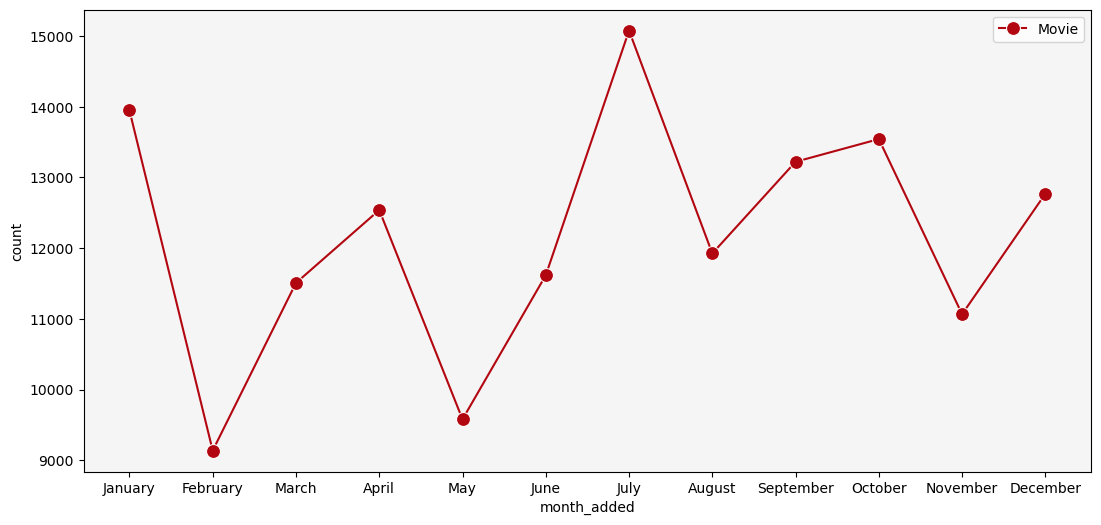

In [102]:
fig,ax = plt.subplots(figsize = (13,6))
ax.set_facecolor('#f6f5f5')
sns.lineplot(data = month_movie, x = 'month_added', y = 'count',marker = 'o',markersize = 10,color ='#b20710',
             label = 'Movie',ax = ax)


In [103]:
month_tv = month.loc[month['type'] == 'TV Show'].sort_values(by = 'count')
month_tv.head(12)

month_added     type  count
7     February  TV Show   3923
17         May  TV Show   4248
21     October  TV Show   4255
15       March  TV Show   4352
9      January  TV Show   4465
19    November  TV Show   4532
1        April  TV Show   4543
23   September  TV Show   4900
13        June  TV Show   5043
3       August  TV Show   5162
11        July  TV Show   5227
5     December  TV Show   5498

In [104]:
month_tv=month_tv.iloc[-1:-13:-1]
month_tv.head(12)

month_added     type  count
5     December  TV Show   5498
11        July  TV Show   5227
3       August  TV Show   5162
13        June  TV Show   5043
23   September  TV Show   4900
1        April  TV Show   4543
19    November  TV Show   4532
9      January  TV Show   4465
15       March  TV Show   4352
21     October  TV Show   4255
17         May  TV Show   4248
7     February  TV Show   3923

<Axes: xlabel='month_added', ylabel='count'>

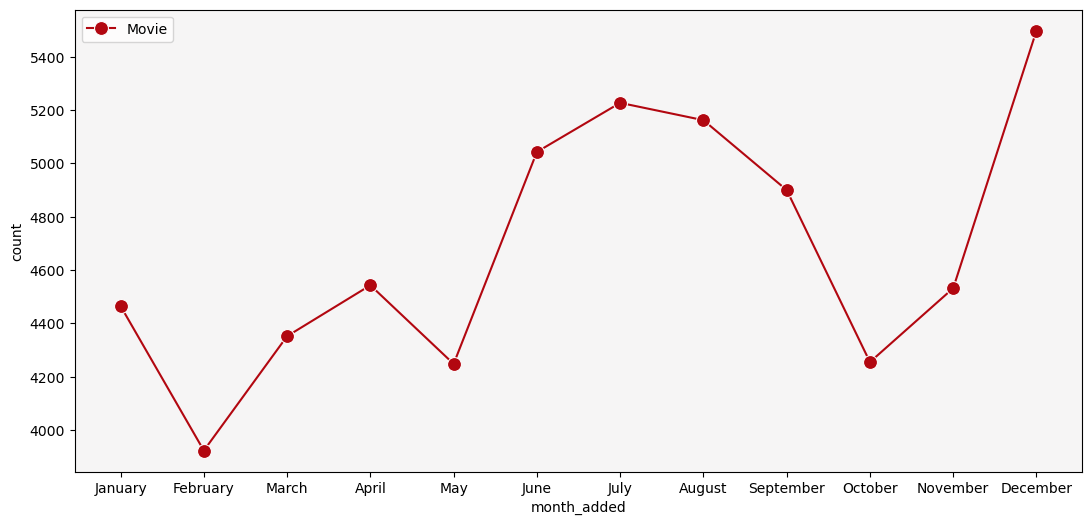

In [105]:
fig,ax = plt.subplots(figsize = (13,6))
ax.set_facecolor('#f6f5f5')
sns.lineplot(data = month_tv, x = 'month_added', y = 'count',marker = 'o',markersize = 10,color ='#b20710',
             label = 'Movie',ax = ax)

4b)Find which is the best week to release the Tv-show or the movie. Do the analysis separately for Tv-shows and Movies

In [106]:
a.head()

show_id     type                 title          director          cast  \
0      s1    Movie  Dick Johnson Is Dead   Kirsten Johnson  Unknown cast   
1      s2  TV Show         Blood & Water  Unknown Director    Ama Qamata   
1      s2  TV Show         Blood & Water  Unknown Director    Ama Qamata   
1      s2  TV Show         Blood & Water  Unknown Director    Ama Qamata   
1      s2  TV Show         Blood & Water  Unknown Director   Khosi Ngema   

         country date_added  release_year rating   duration  \
0  United States 2021-09-25          2020  PG-13     90 min   
1   South Africa 2021-09-24          2021  TV-MA  2 Seasons   
1   South Africa 2021-09-24          2021  TV-MA  2 Seasons   
1   South Africa 2021-09-24          2021  TV-MA  2 Seasons   
1   South Africa 2021-09-24          2021  TV-MA  2 Seasons   

                listed_in                                        description  \
0           Documentaries  As her father nears the end of his life, filmm...   
1  International TV Shows  After crossing paths at a party, a Cape Town t...   
1               TV Dramas  After crossing paths at a party, a Cape Town t...   
1            TV Mysteries  After crossing paths at a party, a Cape Town t...   
1  International TV Shows  After crossing paths at a party, a Cape Town t...   

   year_added month_added  week_added  
0        2021   September          38  
1        2021   September          38  
1        2021   September          38  
1        2021   September          38  
1        2021   September          38

In [107]:
week = a.groupby('week_added')['type'].value_counts()
week.name = 'count' 
week = week.reset_index()


week.head(10)

week_added     type  count
0           1    Movie   8456
1           1  TV Show   1176
2           2    Movie   1618
3           2  TV Show    812
4           3    Movie   2031
5           3  TV Show    601
6           4    Movie   1047
7           4  TV Show    788
8           5    Movie   3148
9           5  TV Show   1386

In [108]:
week['week_added'] = week['week_added'].astype('int64')

In [109]:
week_movie = week.loc[week['type'] == 'Movie'].sort_values(by = 'week_added')
week_movie.head()

week_added   type  count
0           1  Movie   8456
2           2  Movie   1618
4           3  Movie   2031
6           4  Movie   1047
8           5  Movie   3148

<Axes: xlabel='week_added', ylabel='count'>

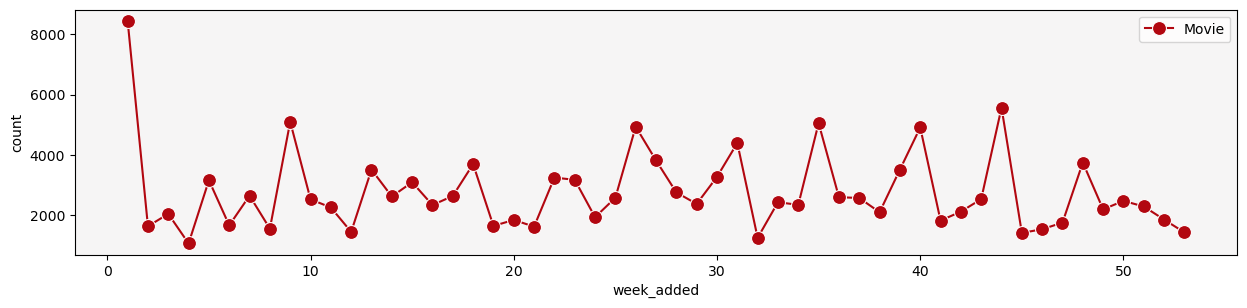

In [110]:
fig = plt.figure(figsize = (15,7))
gs = fig.add_gridspec(2,1)

ax0 = fig.add_subplot(gs[0,:])
ax0.set_facecolor('#f6f5f5')
sns.lineplot(data = week_movie, x = 'week_added', y = 'count',marker = 'o',markersize = 10,color ='#b20710',
             label = 'Movie',ax = ax0)

In [111]:
week_tv = week.loc[week['type'] == 'TV Show'].sort_values(by = 'week_added')
week_tv.head()

week_added     type  count
1           1  TV Show   1176
3           2  TV Show    812
5           3  TV Show    601
7           4  TV Show    788
9           5  TV Show   1386

<Axes: xlabel='week_added', ylabel='count'>

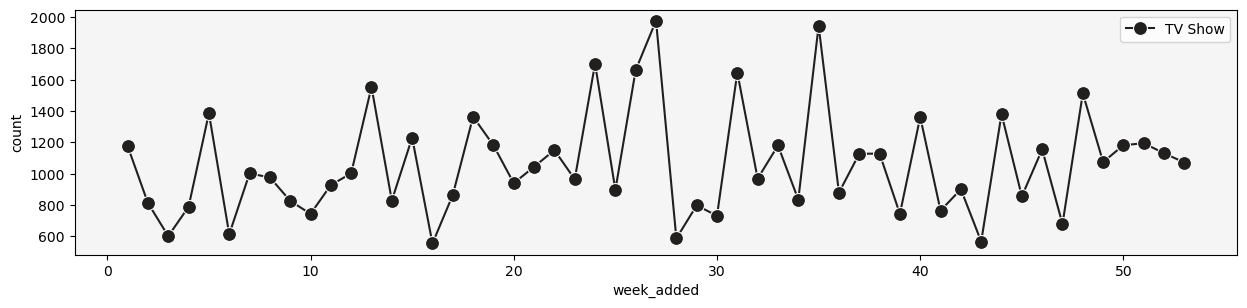

In [112]:
fig = plt.figure(figsize = (15,7))
gs = fig.add_gridspec(2,1)

ax1 = fig.add_subplot(gs[1,:])
ax1.set_facecolor('#f6f5f5')
sns.lineplot(data = week_tv, x = 'week_added', y = 'count',marker = 'o',markersize = 10,color ='#221f1f',
             label = 'TV Show', ax = ax1)


# 5)Which genre movies are more popular or produced more

In [113]:
a.head()

show_id     type                 title          director          cast  \
0      s1    Movie  Dick Johnson Is Dead   Kirsten Johnson  Unknown cast   
1      s2  TV Show         Blood & Water  Unknown Director    Ama Qamata   
1      s2  TV Show         Blood & Water  Unknown Director    Ama Qamata   
1      s2  TV Show         Blood & Water  Unknown Director    Ama Qamata   
1      s2  TV Show         Blood & Water  Unknown Director   Khosi Ngema   

         country date_added  release_year rating   duration  \
0  United States 2021-09-25          2020  PG-13     90 min   
1   South Africa 2021-09-24          2021  TV-MA  2 Seasons   
1   South Africa 2021-09-24          2021  TV-MA  2 Seasons   
1   South Africa 2021-09-24          2021  TV-MA  2 Seasons   
1   South Africa 2021-09-24          2021  TV-MA  2 Seasons   

                listed_in                                        description  \
0           Documentaries  As her father nears the end of his life, filmm...   
1  International TV Shows  After crossing paths at a party, a Cape Town t...   
1               TV Dramas  After crossing paths at a party, a Cape Town t...   
1            TV Mysteries  After crossing paths at a party, a Cape Town t...   
1  International TV Shows  After crossing paths at a party, a Cape Town t...   

   year_added month_added  week_added  
0        2021   September          38  
1        2021   September          38  
1        2021   September          38  
1        2021   September          38  
1        2021   September          38

In [114]:
movie_genre = a[a['type'] == 'Movie']
text = str(list(movie_genre['listed_in'])).replace(',','').replace("'",'').replace('"','').replace('[','').replace(']','')

'Documentaries Children & Family Movies Children & Family Movies Children & Family Movies Children & Family Movies Children & Family Movies Children & Family Movies Children & Family Movies Children & Family Movies Children & Family Movies Children & Family Movies Children & Family Movies Children & Family Movies Children & Family Movies Children & Family Movies Children & Family Movies Children & Family Movies Children & Family Movies Children & Family Movies Children & Family Movies Children & Family Movies Dramas  Independent Movies  International Movies Dramas  Independent Movies  International Movies Dramas  Independent Movies  International Movies Dramas  Independent Movies  International Movies Dramas  Independent Movies  International Movies Dramas  Independent Movies  International Movies Dramas  Independent Movies  International Movies Dramas  Independent Movies  International Movies Dramas  Independent Movies  International Movies Dramas  Independent Movies  International Mo

In [115]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

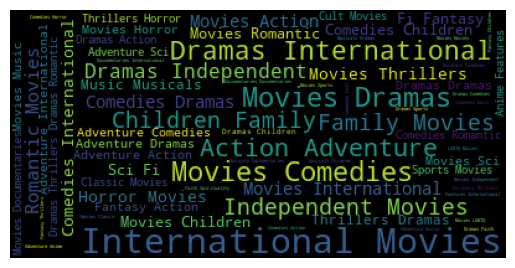

In [116]:
#Instantiate wordcloud object and use method to feed it our corpus
wc = WordCloud().generate_from_text(text)

#Use matplotlib.pyplot to display the fitted wordcloud
#Turn axis off to get rid of axis numbers
plt.imshow(wc)
plt.axis('off')
plt.show()

In [117]:
tv_genre  = a[a['type'] == 'TV Show']
text1 = str(list(tv_genre['listed_in'])).replace(',','').replace("'",'').replace('"','').replace('[','').replace(']','')



'International TV Shows  TV Dramas  TV Mysteries International TV Shows  TV Dramas  TV Mysteries International TV Shows  TV Dramas  TV Mysteries International TV Shows  TV Dramas  TV Mysteries International TV Shows  TV Dramas  TV Mysteries International TV Shows  TV Dramas  TV Mysteries International TV Shows  TV Dramas  TV Mysteries International TV Shows  TV Dramas  TV Mysteries International TV Shows  TV Dramas  TV Mysteries International TV Shows  TV Dramas  TV Mysteries International TV Shows  TV Dramas  TV Mysteries International TV Shows  TV Dramas  TV Mysteries International TV Shows  TV Dramas  TV Mysteries International TV Shows  TV Dramas  TV Mysteries International TV Shows  TV Dramas  TV Mysteries International TV Shows  TV Dramas  TV Mysteries International TV Shows  TV Dramas  TV Mysteries International TV Shows  TV Dramas  TV Mysteries International TV Shows  TV Dramas  TV Mysteries Crime TV Shows  International TV Shows  TV Action & Adventure Crime TV Shows  Internati

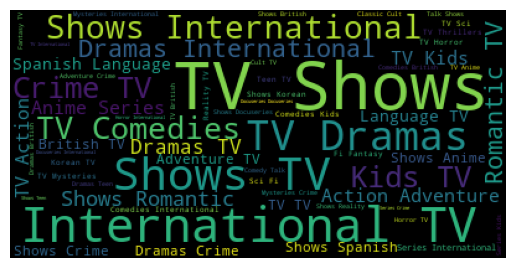

In [118]:
#Instantiate wordcloud object and use method to feed it our corpus
wc = WordCloud().generate_from_text(text1)

#Use matplotlib.pyplot to display the fitted wordcloud
#Turn axis off to get rid of axis numbers
plt.imshow(wc)
plt.axis('off')
plt.show()

# 6) How many days the movie will be added to Netflix after the release of the movie 

In [119]:
a.head()

show_id     type                 title          director          cast  \
0      s1    Movie  Dick Johnson Is Dead   Kirsten Johnson  Unknown cast   
1      s2  TV Show         Blood & Water  Unknown Director    Ama Qamata   
1      s2  TV Show         Blood & Water  Unknown Director    Ama Qamata   
1      s2  TV Show         Blood & Water  Unknown Director    Ama Qamata   
1      s2  TV Show         Blood & Water  Unknown Director   Khosi Ngema   

         country date_added  release_year rating   duration  \
0  United States 2021-09-25          2020  PG-13     90 min   
1   South Africa 2021-09-24          2021  TV-MA  2 Seasons   
1   South Africa 2021-09-24          2021  TV-MA  2 Seasons   
1   South Africa 2021-09-24          2021  TV-MA  2 Seasons   
1   South Africa 2021-09-24          2021  TV-MA  2 Seasons   

                listed_in                                        description  \
0           Documentaries  As her father nears the end of his life, filmm...   
1  International TV Shows  After crossing paths at a party, a Cape Town t...   
1               TV Dramas  After crossing paths at a party, a Cape Town t...   
1            TV Mysteries  After crossing paths at a party, a Cape Town t...   
1  International TV Shows  After crossing paths at a party, a Cape Town t...   

   year_added month_added  week_added  
0        2021   September          38  
1        2021   September          38  
1        2021   September          38  
1        2021   September          38  
1        2021   September          38

In [120]:
gd= a[a['type']=='Movie']

In [121]:
year_td=gd[['title', 'release_year','year_added']].reset_index()
year_td

index                             title  release_year  year_added
0           0              Dick Johnson Is Dead          2020        2021
1           6  My Little Pony: A New Generation          2021        2021
2           6  My Little Pony: A New Generation          2021        2021
3           6  My Little Pony: A New Generation          2021        2021
4           6  My Little Pony: A New Generation          2021        2021
...       ...                               ...           ...         ...
145912   8806                            Zubaan          2015        2019
145913   8806                            Zubaan          2015        2019
145914   8806                            Zubaan          2015        2019
145915   8806                            Zubaan          2015        2019
145916   8806                            Zubaan          2015        2019

[145917 rows x 4 columns]

In [122]:
year_td['diff'] = year_td['year_added'] - year_td['release_year']
year_td

index                             title  release_year  year_added  \
0           0              Dick Johnson Is Dead          2020        2021   
1           6  My Little Pony: A New Generation          2021        2021   
2           6  My Little Pony: A New Generation          2021        2021   
3           6  My Little Pony: A New Generation          2021        2021   
4           6  My Little Pony: A New Generation          2021        2021   
...       ...                               ...           ...         ...   
145912   8806                            Zubaan          2015        2019   
145913   8806                            Zubaan          2015        2019   
145914   8806                            Zubaan          2015        2019   
145915   8806                            Zubaan          2015        2019   
145916   8806                            Zubaan          2015        2019   

        diff  
0          1  
1          0  
2          0  
3          0  
4          0  
...      ...  
145912     4  
145913     4  
145914     4  
145915     4  
145916     4  

[145917 rows x 5 columns]

In [123]:
df_dropped2 =year_td.groupby(['title']).last()

In [124]:
df_dropped2 

index  release_year  \
title                                                                  
#Alive                                            2036          2020   
#AnneFrank - Parallel Stories                     2304          2019   
#FriendButMarried                                 2481          2018   
#FriendButMarried 2                               2324          2020   
#Roxy                                             5973          2018   
...                                                ...           ...   
â€‹Maj Rati â€‹â€‹Keteki                          5969          2017   
â€‹Mayurakshi                                     5970          2017   
â€‹â€‹Kuch Bheege Alfaaz                          4667          2018   
ë°˜ë“œì‹œ ìž¡ëŠ”ë‹¤                               5022          2017   
ìµœê°•ì „ì‚¬ ë¯¸ë‹ˆíŠ¹ê³µëŒ€ : ì˜ì›…ì˜ íƒ„ìƒ   7108          2018   

                                                 year_added  diff  
title                                                              
#Alive                                                 2020     0  
#AnneFrank - Parallel Stories                          2020     1  
#FriendButMarried                                      2020     2  
#FriendButMarried 2                                    2020     0  
#Roxy                                                  2019     1  
...                                                     ...   ...  
â€‹Maj Rati â€‹â€‹Keteki                               2018     1  
â€‹Mayurakshi                                          2018     1  
â€‹â€‹Kuch Bheege Alfaaz                               2018     0  
ë°˜ë“œì‹œ ìž¡ëŠ”ë‹¤                                    2018     1  
ìµœê°•ì „ì‚¬ ë¯¸ë‹ˆíŠ¹ê³µëŒ€ : ì˜ì›…ì˜ íƒ„ìƒ        2018     0  

[6131 rows x 4 columns]

In [125]:
df_dropped2.release_year.value_counts()

release_year
2018    767
2017    767
2016    658
2019    633
2020    517
       ... 
1963      1
1961      1
1947      1
1959      1
1966      1
Name: count, Length: 73, dtype: int64

In [126]:
df= df_dropped2.groupby('release_year')['diff'].mean()
df

release_year
1942    75.000000
1943    74.000000
1944    73.000000
1945    72.000000
1946    71.000000
          ...    
2017     1.142112
2018     0.804433
2019     0.491311
2020     0.232108
2021     0.000000
Name: diff, Length: 73, dtype: float64

In [127]:
df_dropped2['diff'] = df_dropped2['diff'].astype(int)

In [128]:
df_dropped2 

index  release_year  \
title                                                                  
#Alive                                            2036          2020   
#AnneFrank - Parallel Stories                     2304          2019   
#FriendButMarried                                 2481          2018   
#FriendButMarried 2                               2324          2020   
#Roxy                                             5973          2018   
...                                                ...           ...   
â€‹Maj Rati â€‹â€‹Keteki                          5969          2017   
â€‹Mayurakshi                                     5970          2017   
â€‹â€‹Kuch Bheege Alfaaz                          4667          2018   
ë°˜ë“œì‹œ ìž¡ëŠ”ë‹¤                               5022          2017   
ìµœê°•ì „ì‚¬ ë¯¸ë‹ˆíŠ¹ê³µëŒ€ : ì˜ì›…ì˜ íƒ„ìƒ   7108          2018   

                                                 year_added  diff  
title                                                              
#Alive                                                 2020     0  
#AnneFrank - Parallel Stories                          2020     1  
#FriendButMarried                                      2020     2  
#FriendButMarried 2                                    2020     0  
#Roxy                                                  2019     1  
...                                                     ...   ...  
â€‹Maj Rati â€‹â€‹Keteki                               2018     1  
â€‹Mayurakshi                                          2018     1  
â€‹â€‹Kuch Bheege Alfaaz                               2018     0  
ë°˜ë“œì‹œ ìž¡ëŠ”ë‹¤                                    2018     1  
ìµœê°•ì „ì‚¬ ë¯¸ë‹ˆíŠ¹ê³µëŒ€ : ì˜ì›…ì˜ íƒ„ìƒ        2018     0  

[6131 rows x 4 columns]

In [129]:
recent_past_date = pd.to_datetime('2013-01-01')
recent_past_year=  2013

In [130]:
recent_past_df = df_dropped2[df_dropped2['release_year'] >= recent_past_year]
recent_past_df['days_to_addition'] = (recent_past_df['year_added'] - recent_past_df['release_year'])
recent_past_df = recent_past_df[recent_past_df['days_to_addition'] >= 0]


C:\Users\SRI RAM\AppData\Local\Temp\ipykernel_17556\2693208208.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  recent_past_df['days_to_addition'] = (recent_past_df['year_added'] - recent_past_df['release_year'])


Text(0.5, 1.0, 'Distribution of Days to Addition on Netflix After Release Date (Recent Past Data)')

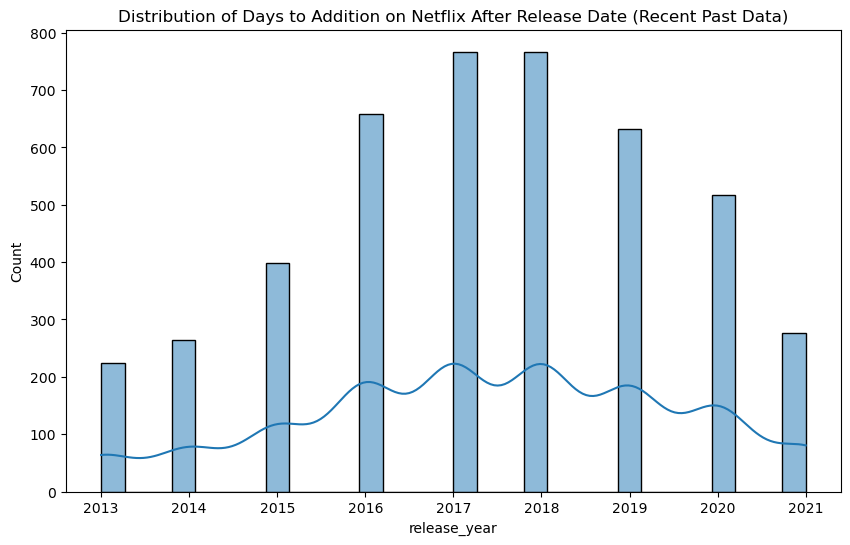

In [131]:
plt.figure(figsize=(10, 6))
sns.histplot(recent_past_df['release_year'], bins=30, kde=True)
plt.title('Distribution of Days to Addition on Netflix After Release Date (Recent Past Data)')

Text(0.5, 1.0, 'Distribution of Days to Addition on Netflix After Release Date (Recent Past Data)')

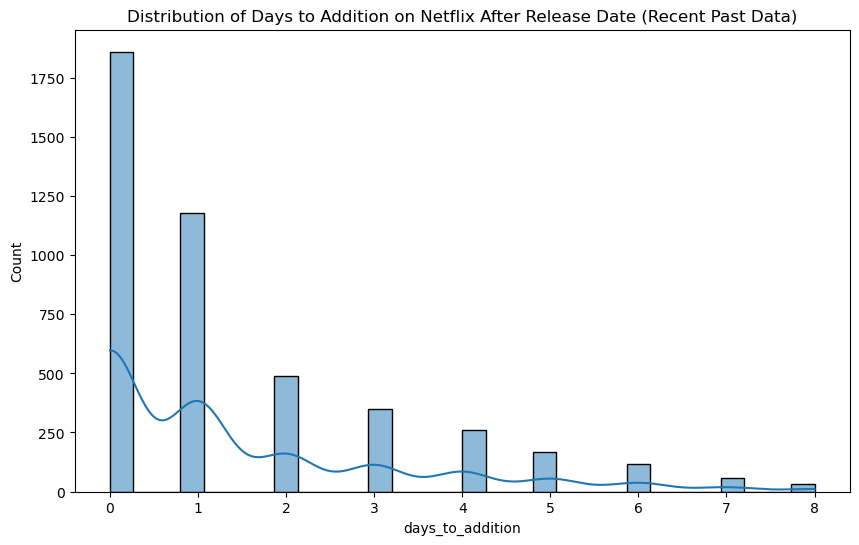

In [132]:
plt.figure(figsize=(10, 6))
sns.histplot(recent_past_df['days_to_addition'], bins=30, kde=True)
plt.title('Distribution of Days to Addition on Netflix After Release Date (Recent Past Data)')

# Insights based on Non-Graphical and Visual Analysis

1) Around 70% content on Netflix is Movies and around 30% content is TV shows.
2) The movies and TV shows uploading on the Netflix started from the year 2008, It had very lesser content till 2014.
3) Year 2015 marks the drastic surge in the content getting uploaded on Netflix. It continues the uptrend since then and 2019 marks the highest number of movies and TV shows added on the Netflix. Year 2020 and 2021 has seen the drop in content added on Netflix, possibly because of Pandemic. But still , TV shows content have not dropped as drastic as movies.
4) Since 2018, A drop in the movies is seen , but rise in TV shows is observed clearly. Being in continuous uptrend , TV shows surpassed the movies count in mid 2020. It shows the rise in popularity of tv shows in recent years.
5) Netflix has movies from variety of directors. Around 4993 directors have their movies or tv shows on Netflix.
6) Netflix has movies from total 122 countries, United States being the highset contributor with almost 37% of all the content.
7) The release year for shows is concentrated in the range 2005-2021.
8) 50 mins - 150 mins is the range of movie durations, excluding potential outliers.
9) 1-3 seasons is the range for TV shows seasons, excluding potential outliers.
10) various ratings of content is avaialble on netfilx, for the various viewers categories like kids, adults , families. Highest number of movies and TV shows are rated TV-MA (for mature audiences).
11) Content in most of the ratings is available in lesser quanitity except in US. Ratings like TV-Y7 , TV-Y7 FV , PG ,TV-G , G , TV-Y , TV-PG are very less avaialble in all countries except US.
12) International Movies and TV Shows , Dramas , and Comedies are the top 3 genres on Netflix for both Movies and TV shows.
13) Mostly country specific popular genres are observed in each country. Only United States have a good mix of almost all    genres. Eg. Korean TV shows (Korea), British TV Shows (UK), Anime features and Anime series (Japan) and so on.
14) Indian Actors have been acted in maximum movies on netflix. Top 5 actors are in India based on quantity of movies.
    Shorter duration movies have been popular in last 10 years.



# Business Insights

1) Netflix have majority of content which is released after the year 2000. It is observed that the content older than year 2000 is very scarce on Netflix. Senior Citizen could be the target audience for such content, which is almost missing currently.
2) Most popular genres on Netflix are International Movies and TV Shows , Dramas , Comedies, Action & Adventure, Children & Family Movies, Thrillers.
3) Maximum content of Netflix which is around 75% , is coming from the top 10 countries. Rest of the world only contributes 25% of the content. More countries can be focussed in future to grow the business.
4) Liking towards the shorter duration content is on the rise. (duration 75 to 150 minutes and seasons 1 to 3) This can be considered while production of new content on Netflix.
5) Drop in content is seen across all the countries and type of content in year 2020 and 2021, possibly because of Pandemic.







# Recommendations 

1) Very limited genres are focussed in most of the countries except US. It seems the current available genres suits best for US and few countries but maximum countries need some more genres which are highly popular in the region. eg. Indian Mythological content is highly popular. We can create such more country specific genres and It might also be liked acorss the world just like Japanese Anime.

 2) Country specific insights - The content need to be targetting the demographic of any country. Netflix can produce higher number of content in the perticular rating as per demographic of the country. Eg.
3) The country like India , which is highly populous , has maximum content available only in three rating TV-MA, TV-14 , TV-PG. It is unlikely to serve below 14 age and above 35 year age group .
4) Country Japan have only 3 rating of content largely served - TV-MA, TV-14 , TV-PG. Japan have high population of age above 60, and this can be served by increasing the content suitable for this age group
5) Netflix is currently serving mostly Mature audiences or Children with parental guidance. It have scope to cater other audiences as well such as familymen , Senior citizen , kids of various age etc.
